# Import All Libraries


In [1]:
# GENERAL
import sys
from packaging import version
import uuid
import multiprocessing

# DATA
import numpy as np
import pandas as pd

# VISULISATION
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Data Repository

from ucimlrepo import fetch_ucirepo

# MACHINE LEARNING

# Scikitlearn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    IsolationForest,
)
from sklearn.impute import SimpleImputer, MissingIndicator

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    auc,
    log_loss,
    accuracy_score,
    make_scorer,
    average_precision_score,
    mean_squared_error,
    balanced_accuracy_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve, ClassPredictionError
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.utils.class_weight import compute_sample_weight


from sklearn.base import clone

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# DEEP LEARNING

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import (
    CategoricalCrossentropy,
    SparseCategoricalCrossentropy,
    BinaryCrossentropy,
)

# Conditional Tabular GANs
from ctgan import CTGAN


# Oversampling
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

# Hyperparameter Tunning
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# AI Explainability
import shap

# Deployment
import streamlit as st
import joblib

# Fairness
from fairlearn.metrics import MetricFrame, true_positive_rate, true_negative_rate
from fairlearn.reductions import (
    ExponentiatedGradient,
    DemographicParity,
    EqualizedOdds,
    TruePositiveRateParity,
)
from fairlearn.postprocessing import ThresholdOptimizer
import json

from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.outliers import Winsorizer, OutlierTrimmer

from feature_engine.selection import (
    RecursiveFeatureAddition,
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures,
    SelectByShuffling,
    SelectByTargetMeanPerformance,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
)
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data


In [2]:
def load_data_from_uci():
    """Go to UC Irvine Machine Learning reposity and find the Data Set you like
    https://archive.ics.uci.edu/dataset/2/adult and then use Import
    in Python button and then Copy the Python Code into your Notebook
    to Load the Data
    """

    # fetch dataset
    bank_marketing = fetch_ucirepo(id=222)

    # data (as pandas dataframes)
    input_features = bank_marketing.data.features
    target_feature = bank_marketing.data.targets
    return input_features, target_feature, bank_marketing


input_features, target_feature, bank_marketing = load_data_from_uci()

# Goal of this work and source of data

In [3]:
# metadata of the dataset

print(json.dumps(bank_marketing.metadata, indent=4))

{
    "uci_id": 222,
    "name": "Bank Marketing",
    "repository_url": "https://archive.ics.uci.edu/dataset/222/bank+marketing",
    "data_url": "https://archive.ics.uci.edu/static/public/222/data.csv",
    "abstract": "The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).",
    "area": "Business",
    "tasks": [
        "Classification"
    ],
    "characteristics": [
        "Multivariate"
    ],
    "num_instances": 45211,
    "num_features": 16,
    "feature_types": [
        "Categorical",
        "Integer"
    ],
    "demographics": [
        "Age",
        "Occupation",
        "Marital Status",
        "Education Level"
    ],
    "target_col": [
        "y"
    ],
    "index_col": null,
    "has_missing_values": "yes",
    "missing_values_symbol": "NaN",
    "year_of_dataset_creation": 2014,
    "last_updated": "Fri Aug 18 2023",
  

In [4]:
print(bank_marketing.metadata["tasks"])

['Classification']


In [5]:
print(bank_marketing.metadata["additional_info"]["summary"])

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict i

In [6]:
print(
    f" shape of the input features is: {input_features.shape} \n\n\n shape of the target features is: {target_feature.shape}"
)

 shape of the input features is: (45211, 16) 


 shape of the target features is: (45211, 1)


The data has $45211$ entries, $16$ features and $1$ target variable. What are these features or variables?

In [7]:
print(bank_marketing.metadata["additional_info"]["variable_info"])

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "no

# Exploratory Data Analysis

In [3]:
data = pd.concat([input_features, target_feature], axis=1)

# display the first few rows of the data

data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

To avoid data leakage, it is good practice to split the data into train and test set before embarking on feature engineering and missing data imputation

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


This shows the variable type: whether numeric or categorical. Different Non-Null Count shows there is a presence of missing data (more this later).

In [10]:
# data["day_of_week"] = data["day_of_week"].astype("object")
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

To avoid data leakage, it is good practice to split the data into train and test set before embarking on feature engineering and missing data imputation

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("y", axis=1),
    data["y"],
    test_size=0.2,
    random_state=42,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

### categorical variables

Find the categorical variables and their cardinality. Cardinality is the number sub-category within each category. For the job feature, it has $11$ sub-categority or cardinality. High cardinality can lead to uneven distribution between the train and test set. That is some categories are only present in the train set (cause overfitting) and others in the test set (cause operational problems). High cardinal variables tend to dominate over low cardinal ones. High cardinal variable  can also introducd noise with little information. Reducing cardiality can imporve model performance. Rare labels can also be combined to reduce cardinality of the dataset. In this work, I assume labels less than $5\%$ as belonging to rare classes and will have to find ways to deal with them in the feature engineering section (either choosing the most frequent classes or re-grouping).

In [12]:
categorical_variables = X_train.select_dtypes(include=["object"]).columns.to_list()
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
print("There are {} categorical variables".format(len(categorical_variables)))

There are 9 categorical variables


In [14]:
# shows and plots the cardinality of the categorical variables

for variable in categorical_variables:
    print("Variable {} has {} categories".format(variable, X_train[variable].nunique()))

Variable job has 11 categories
Variable marital has 3 categories
Variable education has 3 categories
Variable default has 2 categories
Variable housing has 2 categories
Variable loan has 2 categories
Variable contact has 2 categories
Variable month has 12 categories
Variable poutcome has 3 categories


The cardinality of the variable job is: 12


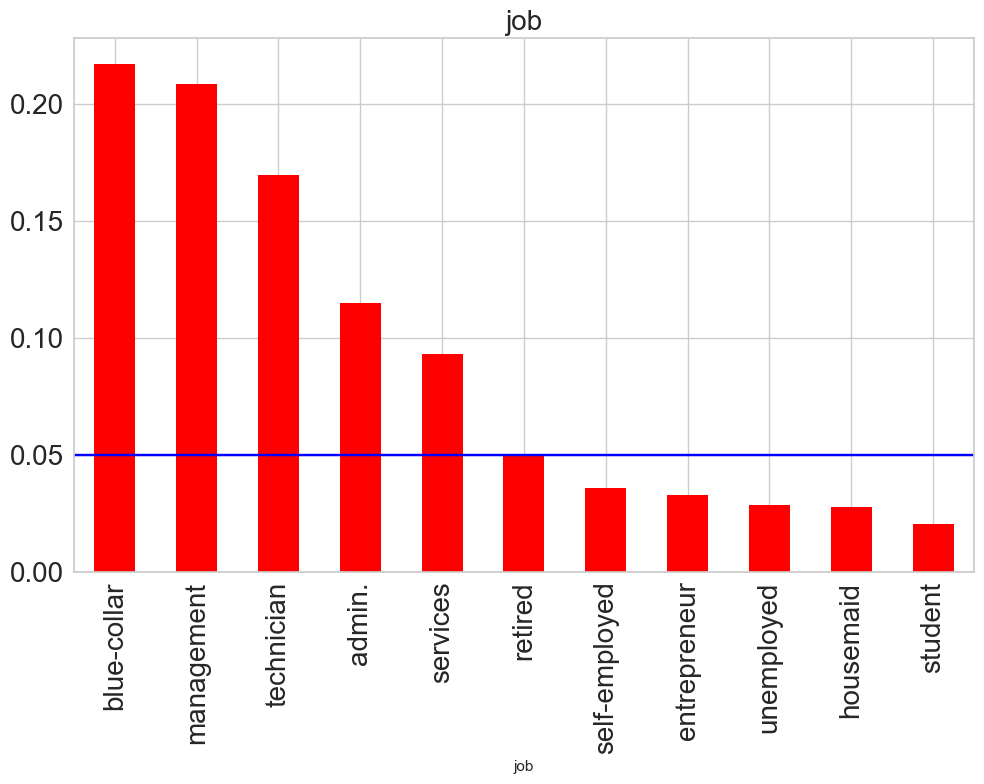

The cardinality of the variable marital is: 3


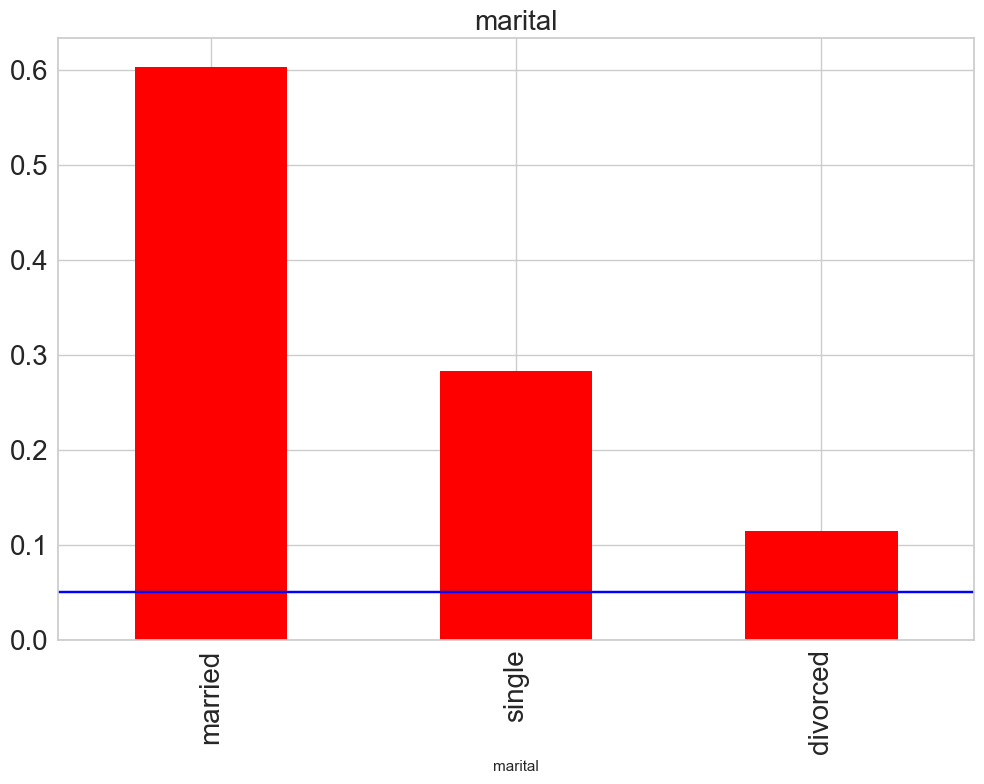

The cardinality of the variable education is: 4


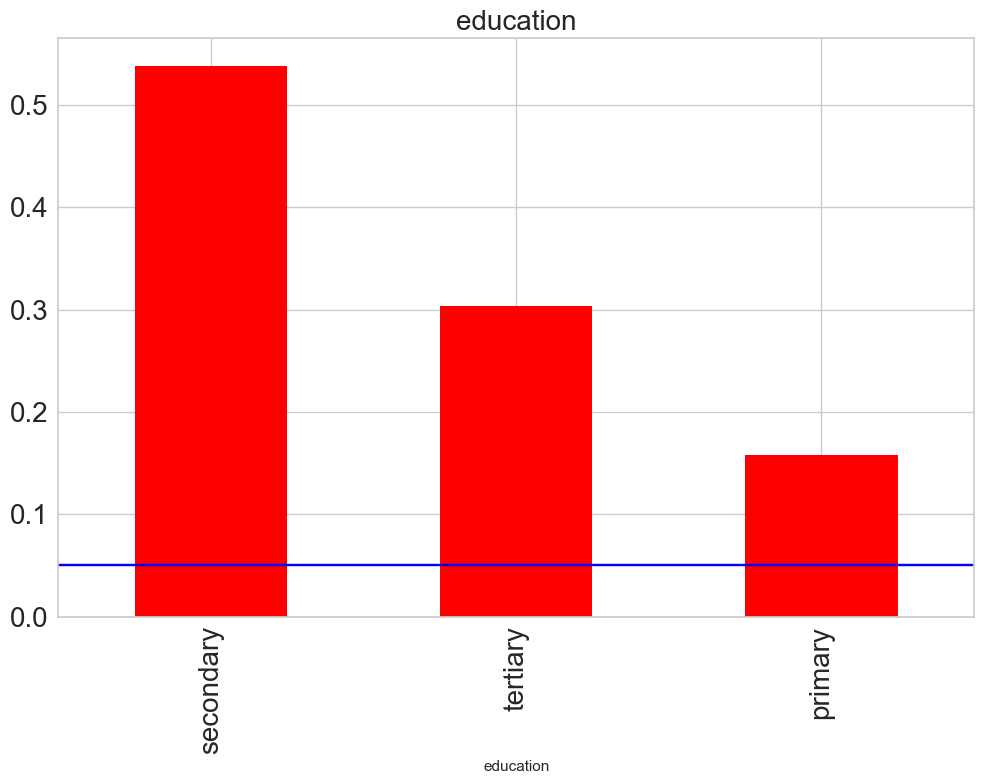

The cardinality of the variable default is: 2


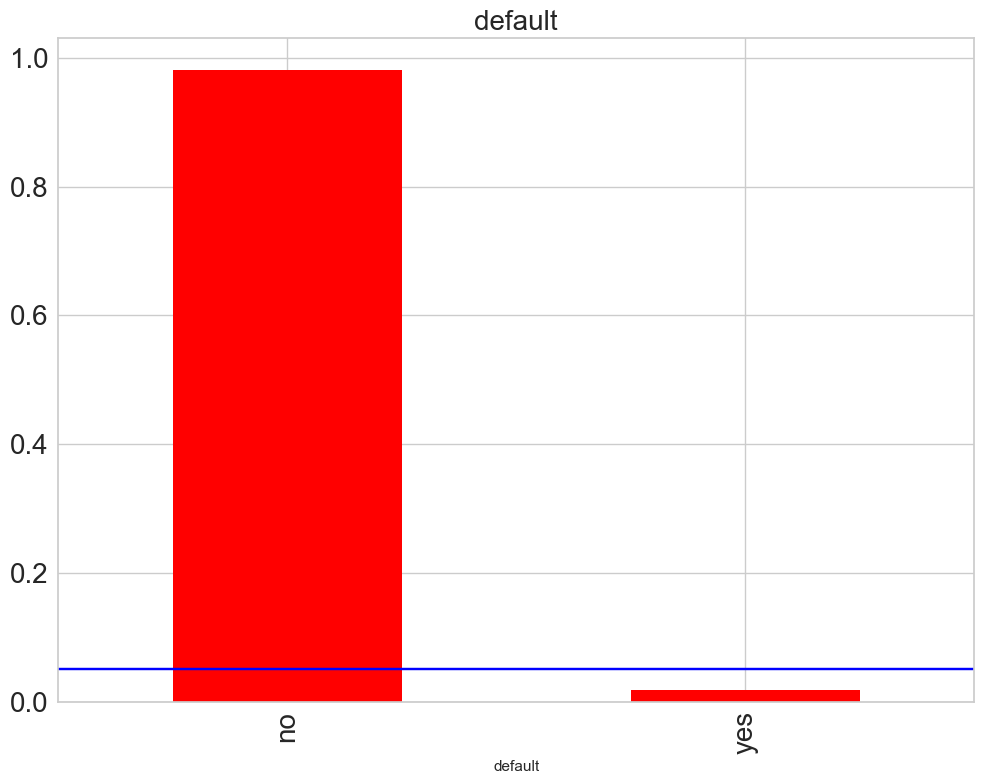

The cardinality of the variable housing is: 2


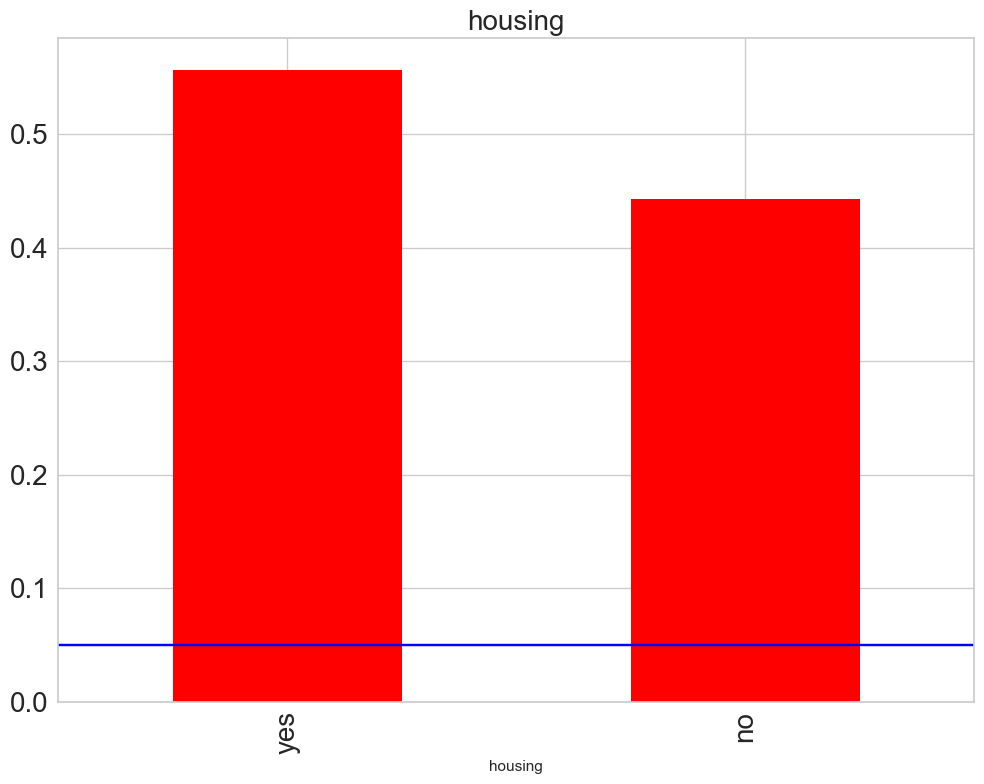

The cardinality of the variable loan is: 2


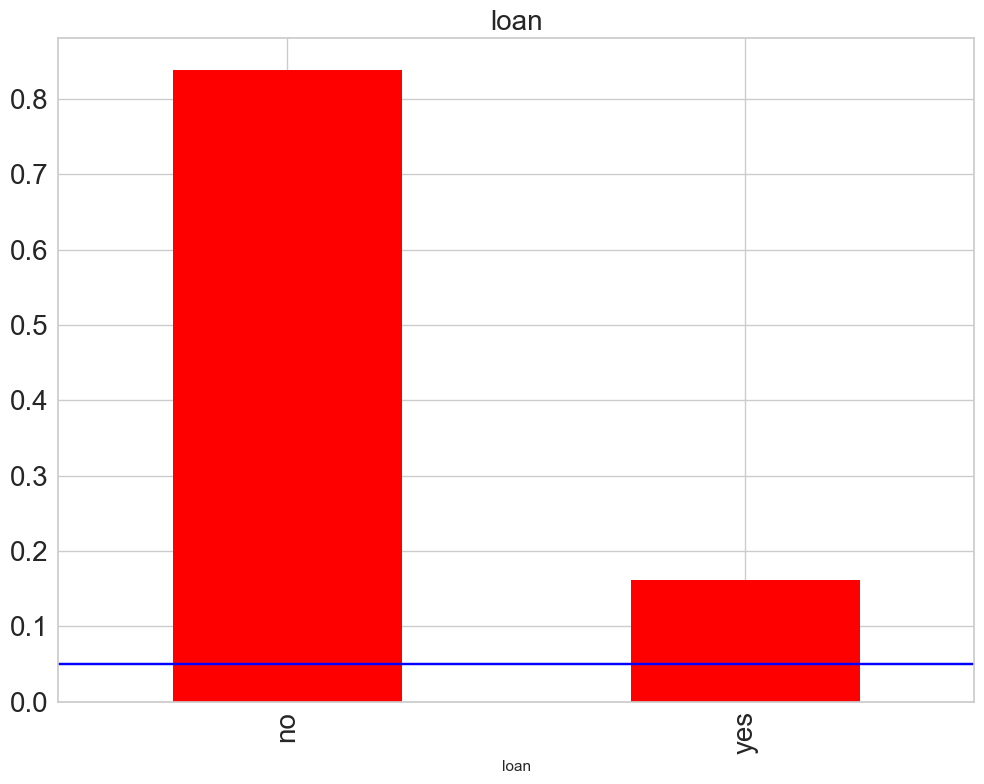

The cardinality of the variable contact is: 3


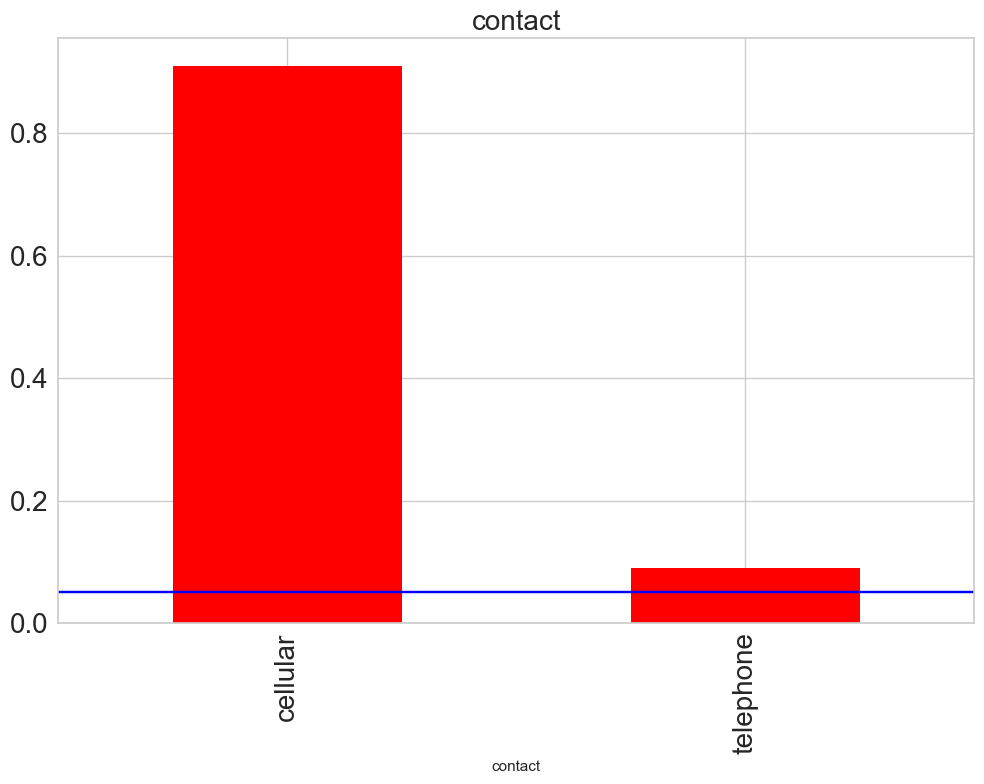

The cardinality of the variable month is: 12


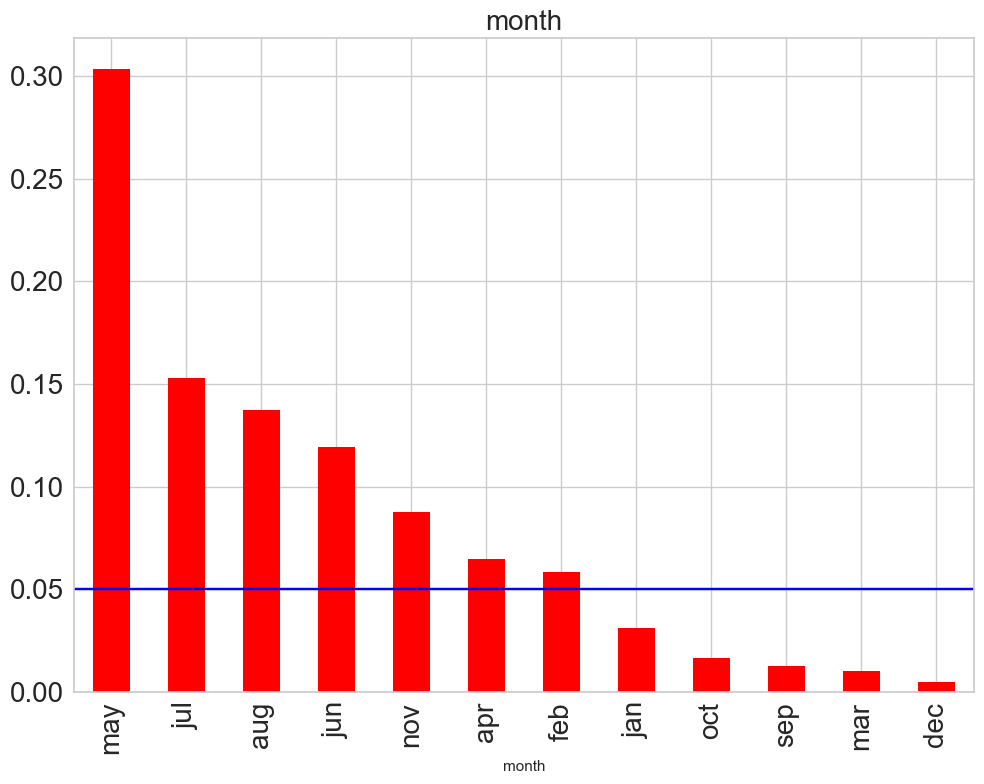

The cardinality of the variable poutcome is: 4


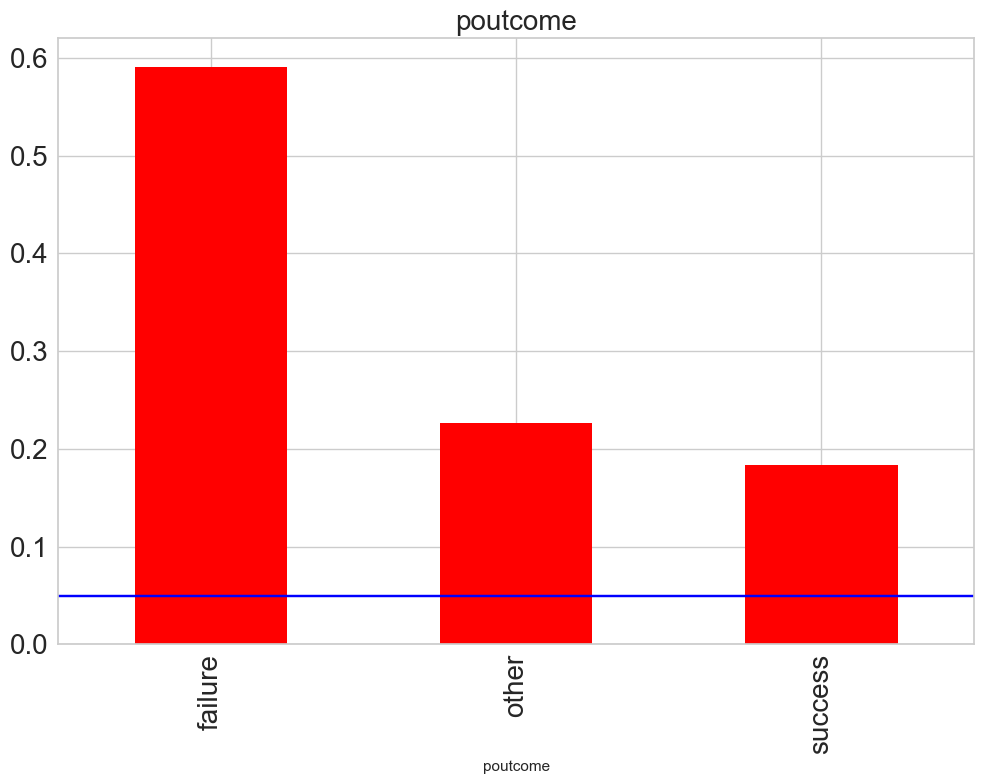

In [15]:
def display_categorical_cardinality(X_train, categorical_variables):

    for variable in categorical_variables:
        print(
            f"The cardinality of the variable {variable} is: {len(X_train[variable].unique())}"
        )

        X_train[variable].value_counts(normalize=True).plot.bar(
            figsize=(10, 8), color="red"
        )
        plt.axhline(y=0.05, color="blue")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.title(variable, fontsize=20)
        plt.tight_layout()

        plt.show()


display_categorical_cardinality(X_train, categorical_variables)

#### Target variable
Here, we determine the relative proportion of each class. This is an imbalance dataset. Later, we will address how to handle imbalance situation like this. This analysis is also neccessary to help us to decide on the choice of a performace metric

In [16]:
y_train.value_counts(normalize=True)

y
no     0.883931
yes    0.116069
Name: proportion, dtype: float64

<Axes: xlabel='y'>

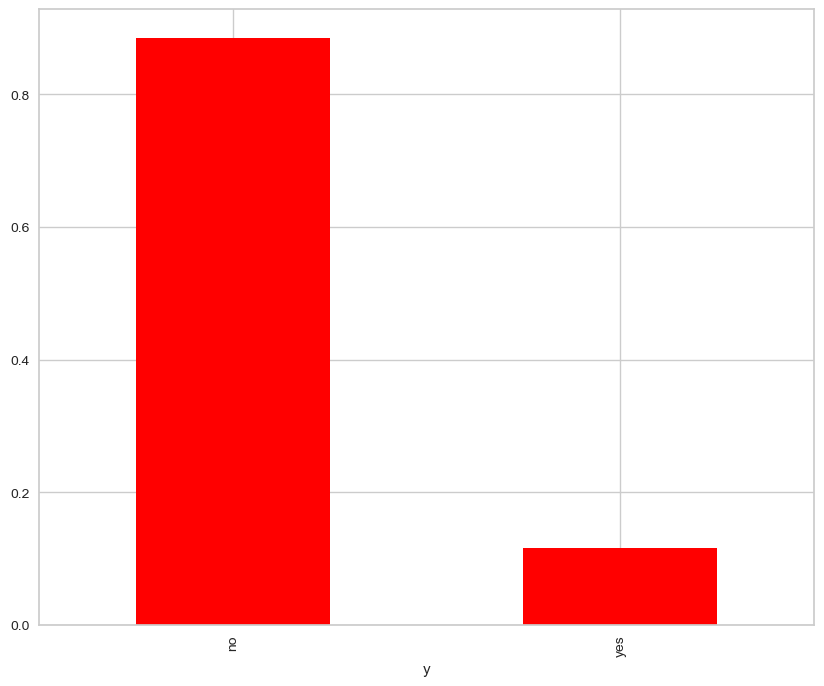

In [17]:
y_train.value_counts(normalize=True).plot.bar(figsize=(10, 8), color="red")

### Numerical Variables


In [18]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.to_list()
numeric_features

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
# numerical: discrete vs continuous
discrete = [
    var
    for var in X_train.columns
    if X_train[var].dtype != "O" and var != "y" and X_train[var].nunique() < 10
]

continuous = [
    var
    for var in X_train.columns
    if X_train[var].dtype != "O" and var != "y" and var not in discrete
]

print("There are {} discrete numerical variables".format(len(discrete)))
print("There are {} continuous numerical variables".format(len(continuous)))

There are 0 discrete numerical variables
There are 7 continuous numerical variables


In [20]:
# checking this statistics shows outliers in balance, duration, campaign, pdays, previous
X_train[numeric_features].describe()

age        balance   day_of_week      duration      campaign  \
count  36168.000000   36168.000000  36168.000000  36168.000000  36168.000000   
mean      40.930823    1361.046146     15.817739    256.891202      2.765649   
std       10.618369    3023.083187      8.325860    256.884103      3.120193   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      70.000000      8.000000    103.000000      1.000000   
50%       39.000000     447.000000     16.000000    180.000000      2.000000   
75%       48.000000    1429.000000     21.000000    318.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  36168.000000  36168.000000  
mean      40.180076      0.580264  
std      100.107617      2.370668  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Visualize the numerical variables to see their distribution, and inform your feature engineering steps. Most of the distributions are right skewed which is not desirable for linear models that implicitly assumed a normal distributed orrors. This means we have apply some trasformations or discritization to handle the outliers. Sometimes histograms can be misleading because its distribtion depends on the bin size chosen. To address, I also plotted the QQ plot which shows that these variables are all not normally distributed

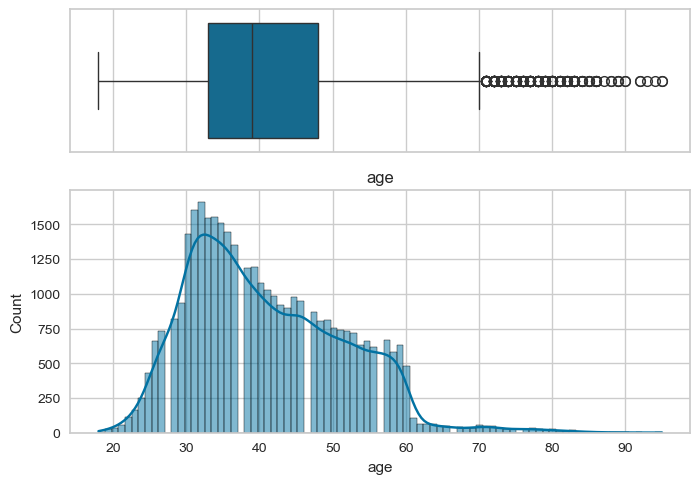

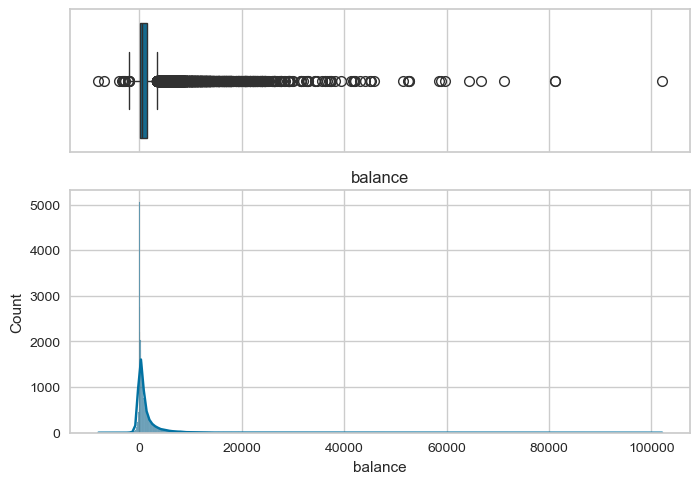

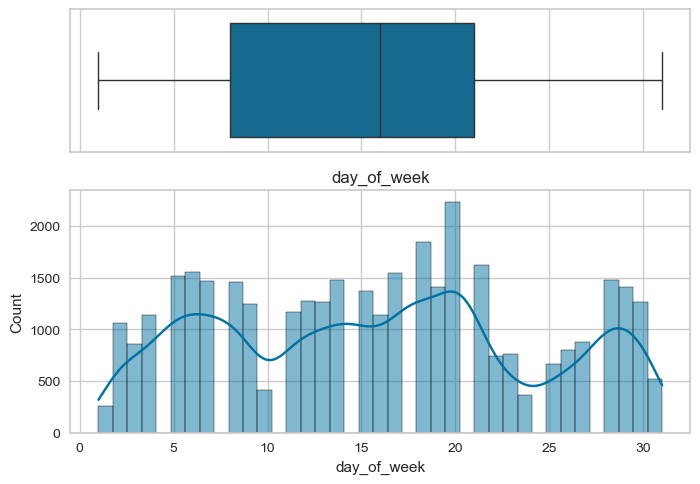

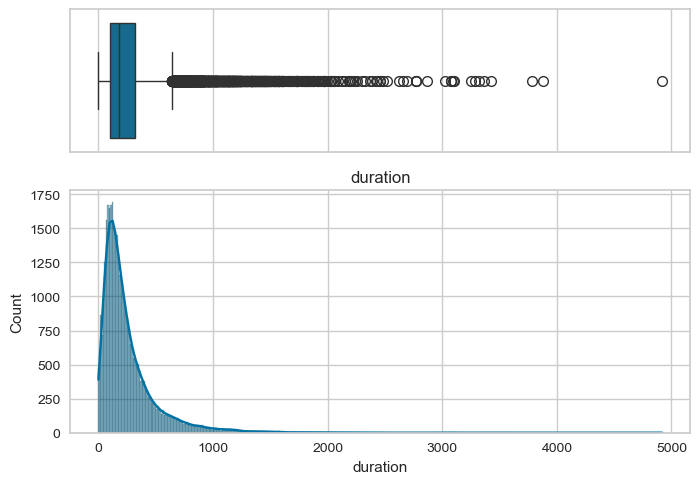

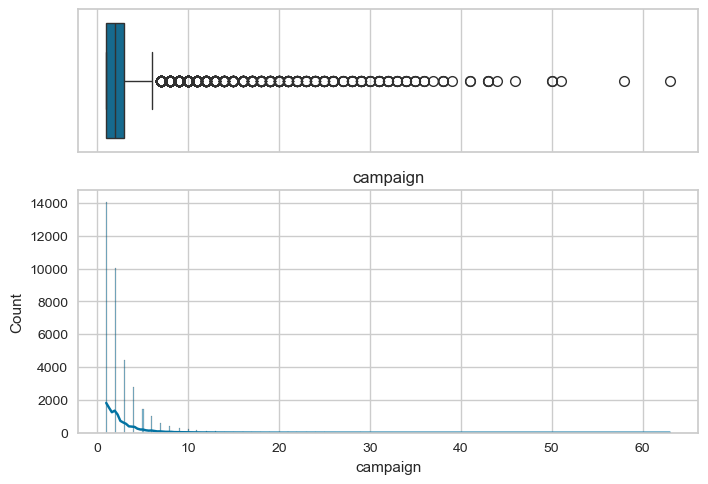

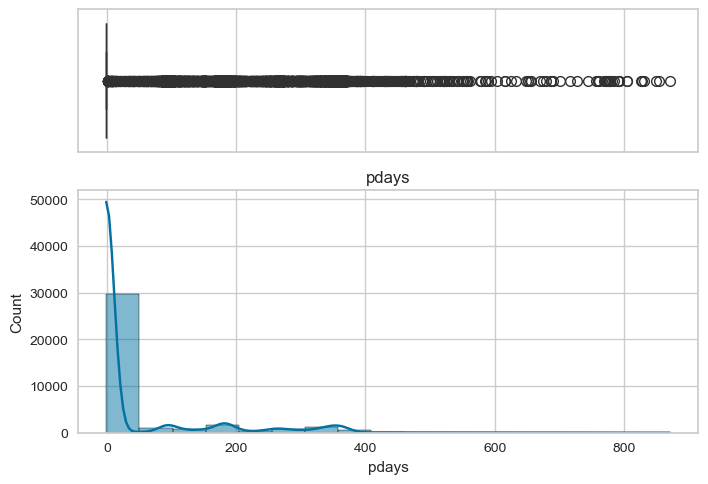

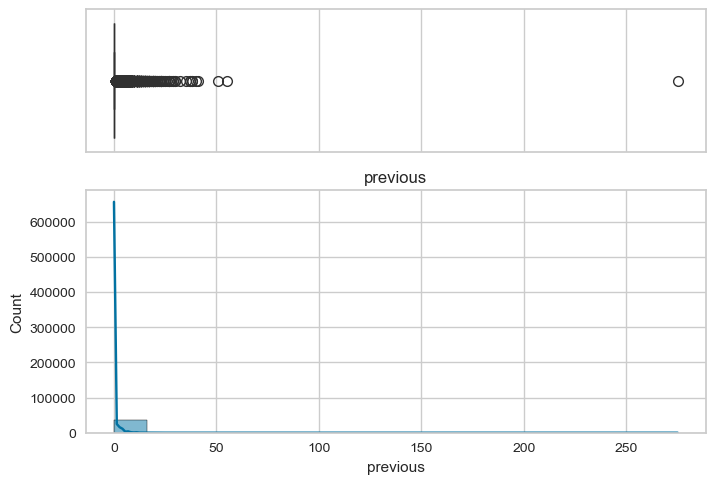

In [21]:
def plot_boxplot_and_hist(data, variable):

    # creating a figure composed of two matplotlib.Axes
    # objects (ax_box and ax_hist)

    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist, kde=True)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()


def make_qqplot(df, num_col):

    import scipy.stats as stats

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i, j in enumerate(num_col):
        # location in figure
        ax = plt.subplot(2, 4, i + 1)

        # q-q plot
        stats.probplot((df[j]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(j)

    plt.show()


for variable in numeric_features:
    plot_boxplot_and_hist(X_train, variable)

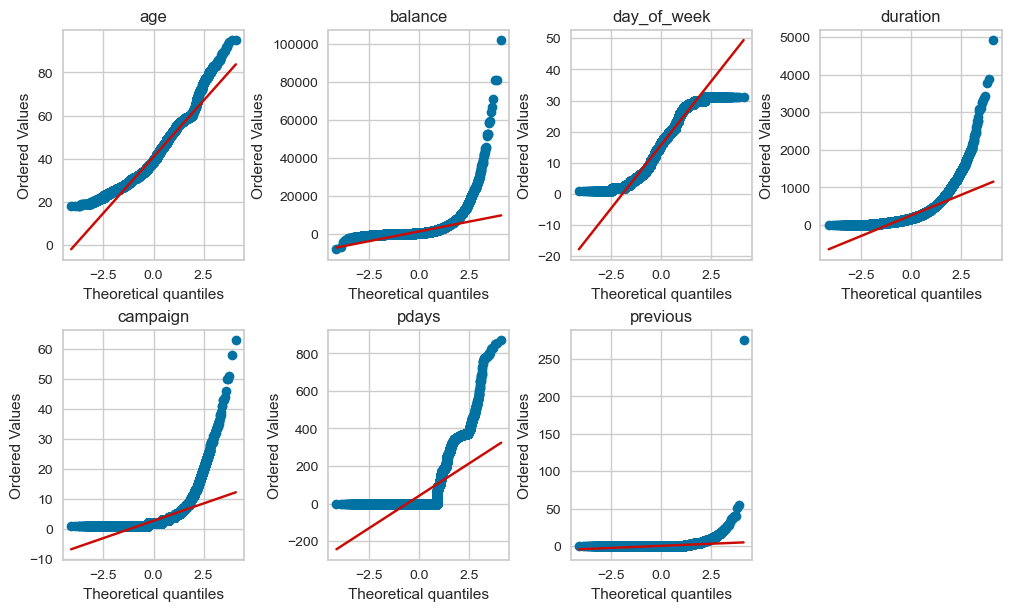

In [22]:
make_qqplot(X_train, numeric_features)

# Feature Engineering

### Missing data impuation

In [23]:
# display the fraction missing data per column

X_train.isnull().mean()

age            0.000000
job            0.006442
marital        0.000000
education      0.041003
default        0.000000
balance        0.000000
housing        0.000000
loan           0.000000
contact        0.287132
day_of_week    0.000000
month          0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.817297
dtype: float64

In [24]:
features_with_nan = [var for var in X_train.columns if X_train[var].isna().any()]
features_with_nan

['job', 'education', 'contact', 'poutcome']

Since categerical and numerical missing data imputations are handle differently, we need to separate these variables types and process them separately. Only the categorical variables have a nan in this dataset. To decide what imputation technique to use, we see the fractin of missing data for each variable and try to understand how this happened. For this dataset it is unclear how the missing data occur so I am going to assume they happened completely randomly. 

For the categorical features: "job" and "education", we will impute the missing value using the most-frequent category imputation (the equivalent of mean/median/mode imputation for numrical variables) plus the missing indicator since less the $5\%$ of the data is missing. This should not affect the statiscal properties of the distribution of the data.

for the other two categories, we use the arbitrary category imputation technique.

In [122]:
imputer = ColumnTransformer(
    [
        (
            "small_cat_imputer",
            SimpleImputer(strategy="most_frequent", add_indicator=True),
            ["job", "education"],
        ),
        (
            "large_cat_imputer",
            SimpleImputer(strategy="constant", fill_value="missing"),
            ["contact", "poutcome"],
        ),
    ],
    remainder="passthrough",
).set_output(transform="pandas")

imputer.fit(X_train)

X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)

X_train_imp.head()

small_cat_imputer__job small_cat_imputer__education  \
3344             blue-collar                      primary   
17965             technician                      primary   
18299                 admin.                    secondary   
10221             management                     tertiary   
32192            blue-collar                      primary   

      small_cat_imputer__missingindicator_job  \
3344                                    False   
17965                                   False   
18299                                   False   
10221                                   False   
32192                                   False   

      small_cat_imputer__missingindicator_education  \
3344                                          False   
17965                                         False   
18299                                         False   
10221                                         False   
32192                                         False   

      large_cat_imputer__contact large_cat_imputer__poutcome  remainder__age  \
3344                     missing                     missing              41   
17965                   cellular                     missing              49   
18299                   cellular                     missing              42   
10221                    missing                     missing              37   
32192                   cellular                     missing              56   

      remainder__marital remainder__default  remainder__balance  \
3344             married                 no                 849   
17965            married                 no                1415   
18299            married                 no                3842   
10221             single                 no                -119   
32192            married                 no                3498   

      remainder__housing remainder__loan  remainder__day_of_week  \
3344                 yes              no                      15   
17965                yes              no                      30   
18299                 no              no                      31   
10221                yes              no                      11   
32192                 no              no                      15   

      remainder__month  remainder__duration  remainder__campaign  \
3344               may                   72                    1   
17965              jul                  269                    2   
18299              jul                  130                    4   
10221              jun                  375                   11   
32192              apr                  264                    2   

       remainder__pdays  remainder__previous  
3344                 -1                    0  
17965                -1                    0  
18299                -1                    0  
10221                -1                    0  
32192                -1                    0

This creates a new dataframe with the imputed variables and a missing indicator variable. The imputation did not affect the distribution of the categorical variables.

In [26]:
X_train_imp.isnull().mean()

small_cat_imputer__job                           0.0
small_cat_imputer__education                     0.0
small_cat_imputer__missingindicator_job          0.0
small_cat_imputer__missingindicator_education    0.0
large_cat_imputer__contact                       0.0
large_cat_imputer__poutcome                      0.0
remainder__age                                   0.0
remainder__marital                               0.0
remainder__default                               0.0
remainder__balance                               0.0
remainder__housing                               0.0
remainder__loan                                  0.0
remainder__day_of_week                           0.0
remainder__month                                 0.0
remainder__duration                              0.0
remainder__campaign                              0.0
remainder__pdays                                 0.0
remainder__previous                              0.0
dtype: float64

In [27]:
numeric_features_imp = X_train_imp.select_dtypes(
    include=["int64", "float64"]
).columns.to_list()
numeric_features_imp

['remainder__age',
 'remainder__balance',
 'remainder__day_of_week',
 'remainder__duration',
 'remainder__campaign',
 'remainder__pdays',
 'remainder__previous']

In [28]:
categorical_variables_imp = X_train_imp.select_dtypes(
    include=["object"]
).columns.to_list()
categorical_variables_imp

['small_cat_imputer__job',
 'small_cat_imputer__education',
 'small_cat_imputer__missingindicator_job',
 'small_cat_imputer__missingindicator_education',
 'large_cat_imputer__contact',
 'large_cat_imputer__poutcome',
 'remainder__marital',
 'remainder__default',
 'remainder__housing',
 'remainder__loan',
 'remainder__month']

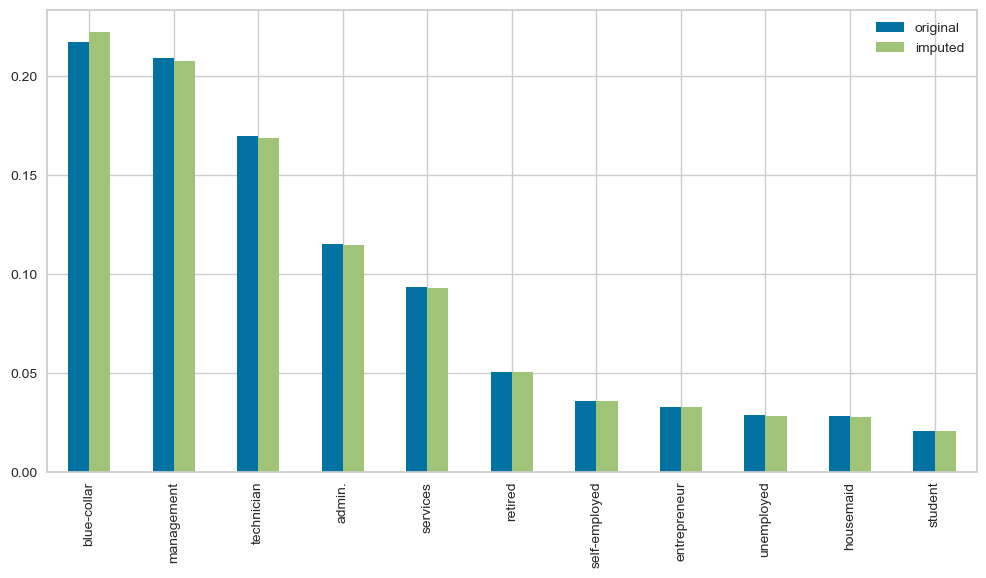

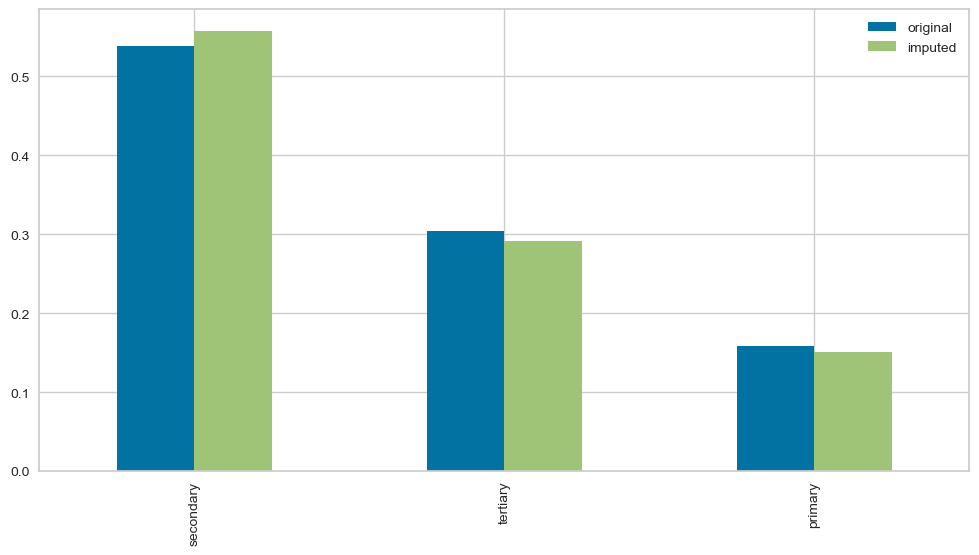

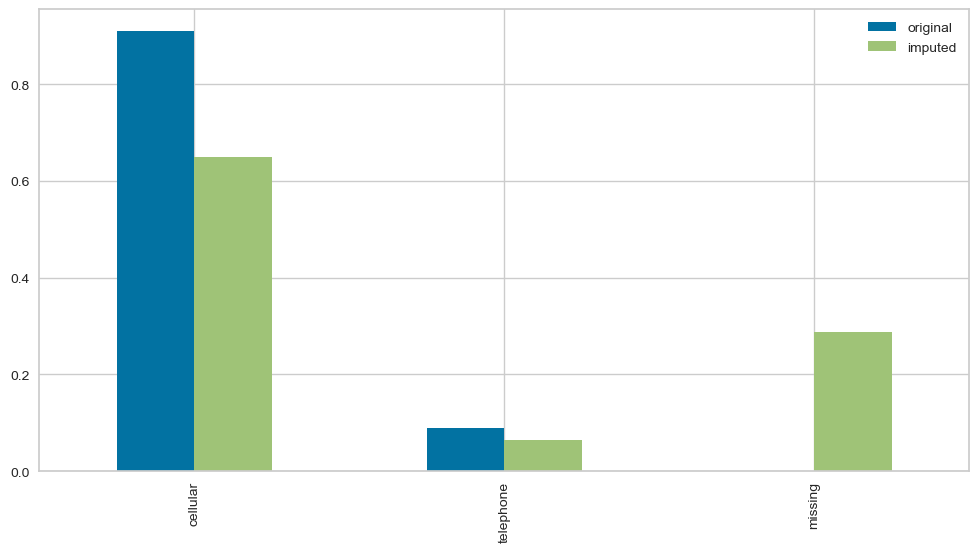

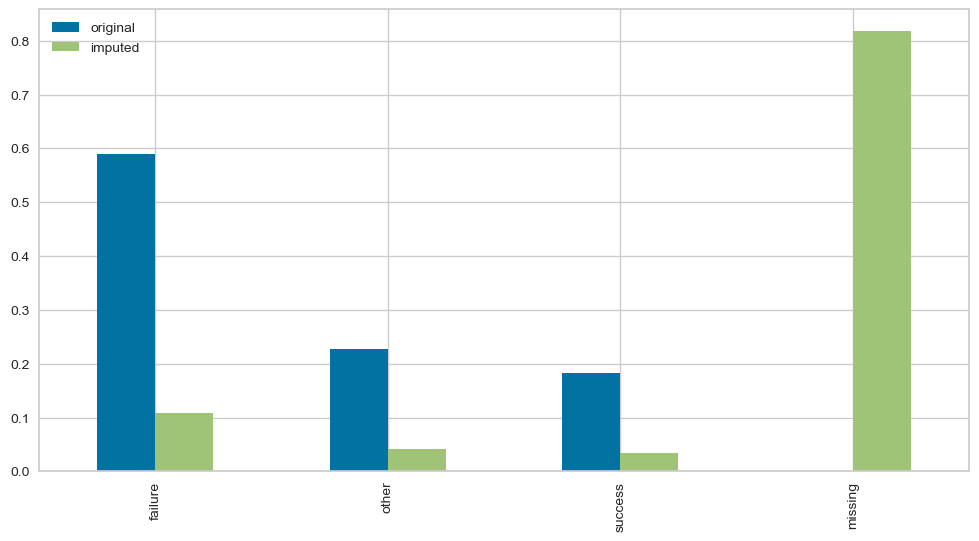

In [29]:
def categorical_distribution(df, df_imp, variable, variable_imp):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts(normalize=True),
            # percentage of observations per category, cca data
            df_imp[variable_imp].value_counts(normalize=True),
        ],
        axis=1,
    )

    # add column names
    tmp.columns = ["original", "imputed"]

    return tmp


variable_imp = [
    "small_cat_imputer__job",
    "small_cat_imputer__education",
    "large_cat_imputer__contact",
    "large_cat_imputer__poutcome",
]

for i, j in zip(features_with_nan, variable_imp):
    temp = categorical_distribution(X_train, X_train_imp, i, j)

    temp.plot(kind="bar", figsize=(12, 6))

### Outlier Detection
Detection: using quantile and IQR for a skewed distribution and mean plus std for a normally distributed variable.

Techniques for handling include: trimming (removing outliers), censoring (capping), discretization, and missing data with imputaion. In this work, I used discretization.

In [87]:
X_train_imp.select_dtypes(include=["int64", "float64"]).describe()

remainder__age  remainder__balance  remainder__day_of_week  \
count    36168.000000        36168.000000            36168.000000   
mean        40.930823         1361.046146               15.817739   
std         10.618369         3023.083187                8.325860   
min         18.000000        -8019.000000                1.000000   
25%         33.000000           70.000000                8.000000   
50%         39.000000          447.000000               16.000000   
75%         48.000000         1429.000000               21.000000   
max         95.000000       102127.000000               31.000000   

       remainder__duration  remainder__campaign  remainder__pdays  \
count         36168.000000         36168.000000      36168.000000   
mean            256.891202             2.765649         40.180076   
std             256.884103             3.120193        100.107617   
min               0.000000             1.000000         -1.000000   
25%             103.000000             1.000000         -1.000000   
50%             180.000000             2.000000         -1.000000   
75%             318.000000             3.000000         -1.000000   
max            4918.000000            63.000000        871.000000   

       remainder__previous  
count         36168.000000  
mean              0.580264  
std               2.370668  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max             275.000000

Carefully studyning the statistical properties of the numerical variables, we see that variables: pdays balance, duration, campaign and previous. 

#### Trimming

Since the distributions are skewed, the quantile and IQR techniques are used. I setteled with quantiles, as the IQR was aggressive in removing most of the observations

In [113]:

trimmer = OutlierTrimmer(
    variables=[
        "remainder__balance",
        "remainder__duration",
        "remainder__campaign",
        "remainder__pdays",
        "remainder__previous",
    ],
    capping_method="quantiles",
    tail="both",
    fold=0.02,
)

trimmer.fit(X_train_imp)

OutlierTrimmer(capping_method='quantiles', fold=0.02, tail='both',
               variables=['remainder__balance', 'remainder__duration',
                          'remainder__campaign', 'remainder__pdays',
                          'remainder__previous'])

In [114]:
trimmer.left_tail_caps_

{'remainder__balance': -451.65999999999997,
 'remainder__duration': 16.0,
 'remainder__campaign': 1.0,
 'remainder__pdays': -1.0,
 'remainder__previous': 0.0}

In [115]:
trimmer.right_tail_caps_

{'remainder__balance': 9430.739999999852,
 'remainder__duration': 1037.6599999999962,
 'remainder__campaign': 12.0,
 'remainder__pdays': 360.0,
 'remainder__previous': 6.0}

In [123]:
print(X_train_imp.shape, X_test_imp.shape)

X_train_imp_enc = trimmer.transform(X_train_imp)
X_test_imp_enc = trimmer.transform(X_test_imp)

print(X_train_imp_enc.shape, X_test_imp_enc.shape)

(36168, 18) (9043, 18)
(31660, 18) (7933, 18)


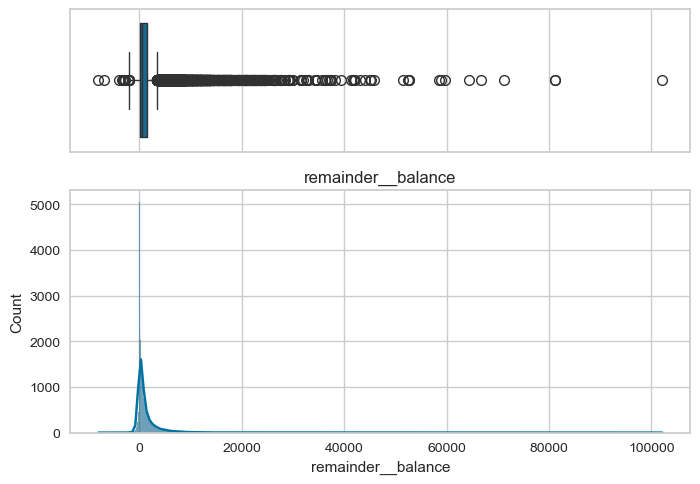

In [107]:
plot_boxplot_and_hist(X_train_imp, "remainder__balance")

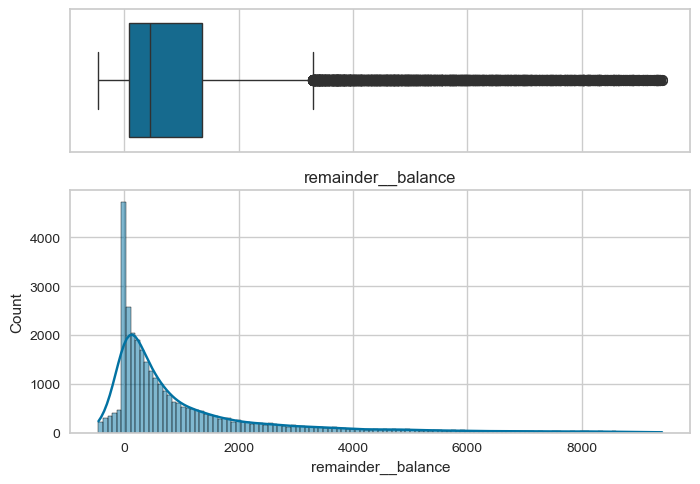

In [108]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__balance")

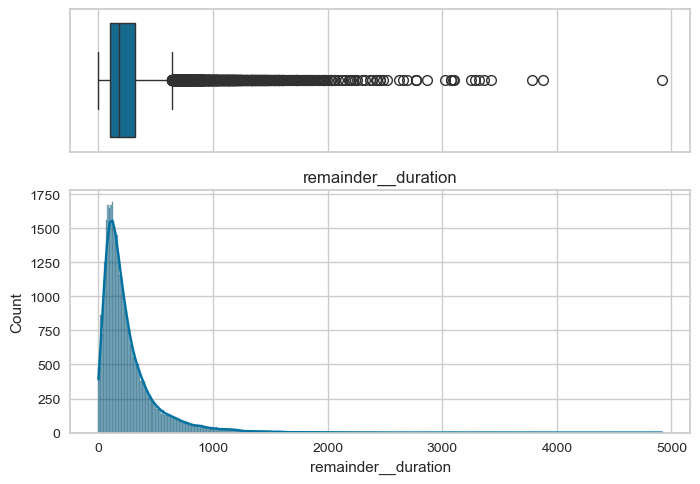

In [109]:
plot_boxplot_and_hist(X_train_imp, "remainder__duration")

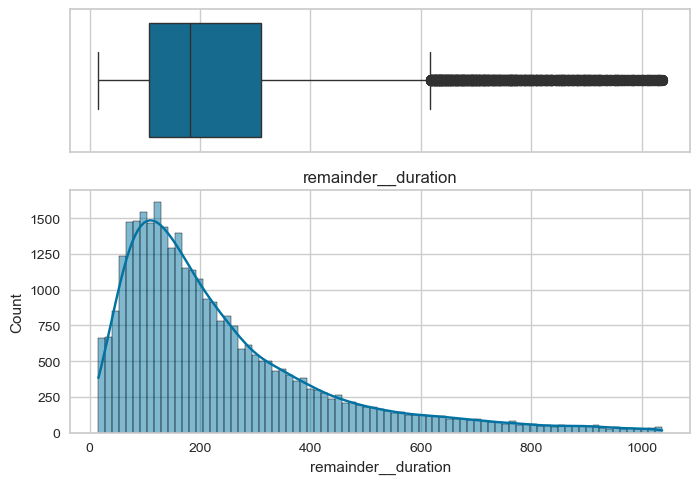

In [110]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__duration")

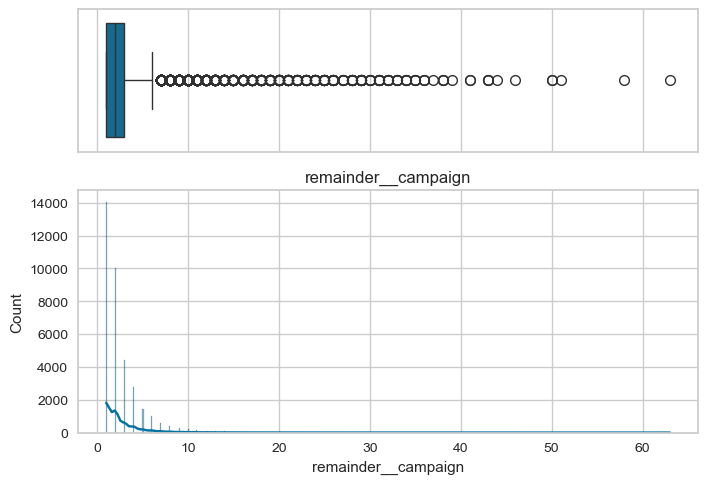

In [111]:
plot_boxplot_and_hist(X_train_imp, "remainder__campaign")

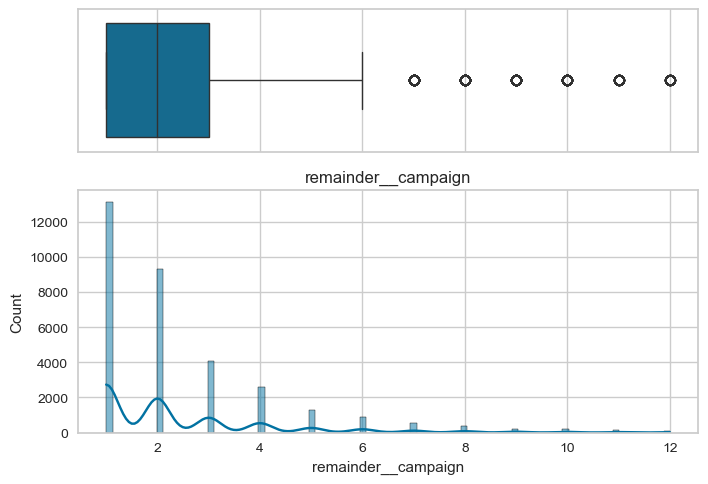

In [112]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__campaign")

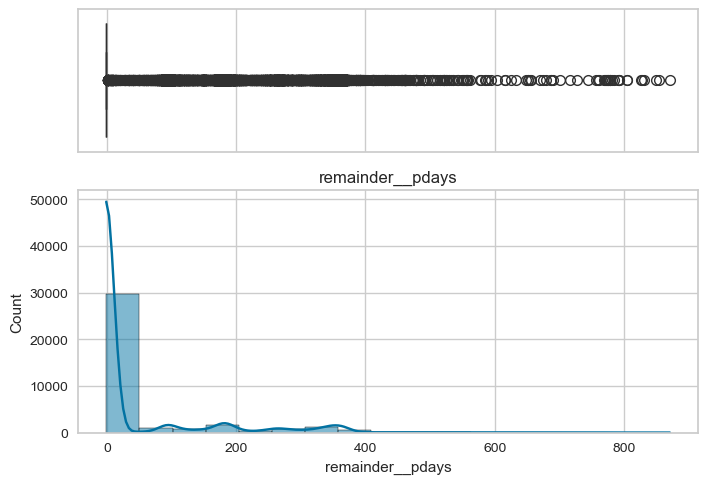

In [117]:
plot_boxplot_and_hist(X_train_imp, "remainder__pdays")

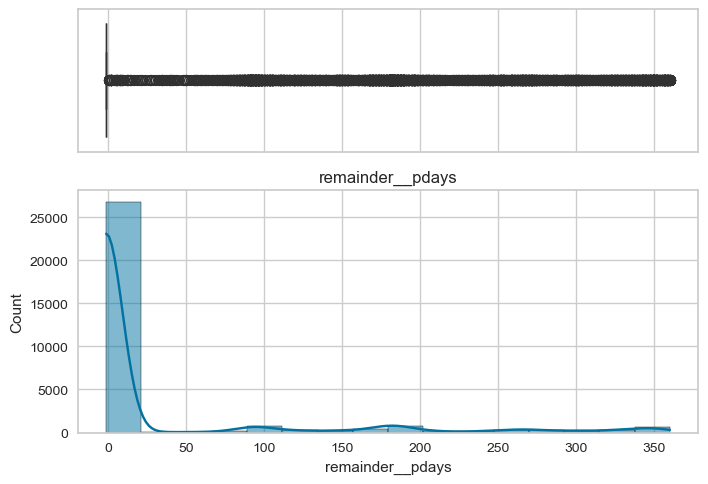

In [118]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__pdays")

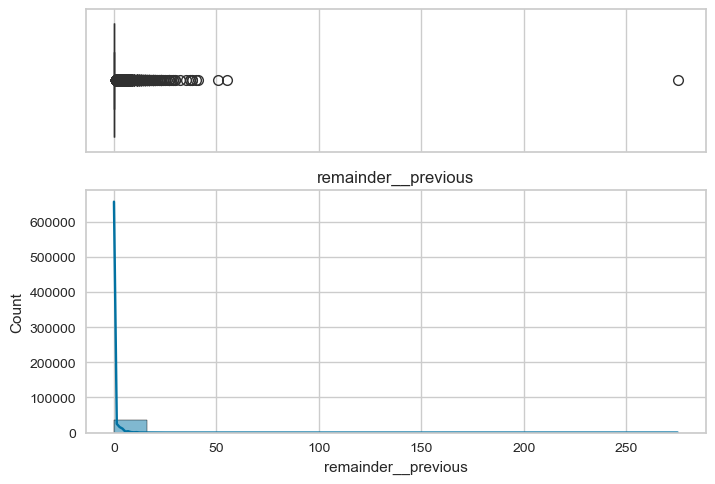

In [119]:
plot_boxplot_and_hist(X_train_imp, "remainder__previous")

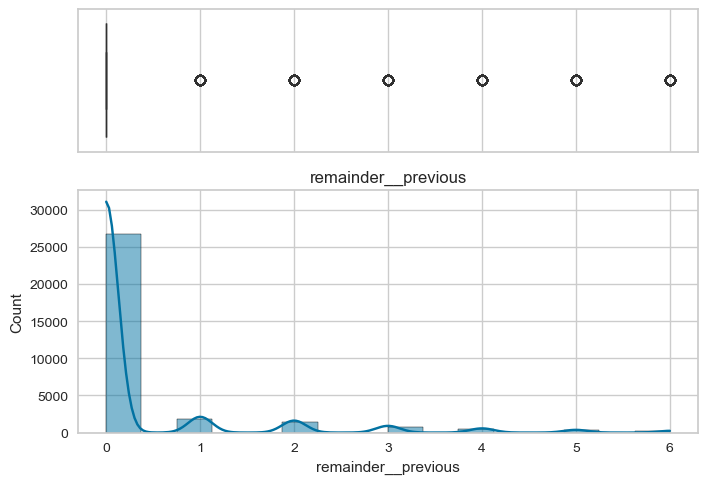

In [120]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__previous")

#### Capping

In [128]:

capper = Winsorizer(
    variables=[
        "remainder__balance",
        "remainder__duration",
        "remainder__campaign",
        "remainder__pdays",
        "remainder__previous",
    ],
    capping_method="quantiles",
    tail="both",
    fold=0.02,
)

capper.fit(X_train_imp)

Winsorizer(capping_method='quantiles', fold=0.02, tail='both',
           variables=['remainder__balance', 'remainder__duration',
                      'remainder__campaign', 'remainder__pdays',
                      'remainder__previous'])

In [129]:
capper.left_tail_caps_

{'remainder__balance': -451.65999999999997,
 'remainder__duration': 16.0,
 'remainder__campaign': 1.0,
 'remainder__pdays': -1.0,
 'remainder__previous': 0.0}

In [130]:
capper.right_tail_caps_

{'remainder__balance': 9430.739999999852,
 'remainder__duration': 1037.6599999999962,
 'remainder__campaign': 12.0,
 'remainder__pdays': 360.0,
 'remainder__previous': 6.0}

In [131]:
print(X_train_imp.shape, X_test_imp.shape)

X_train_imp_enc = capper.transform(X_train_imp)
X_test_imp_enc = capper.transform(X_test_imp)

print(X_train_imp_enc.shape, X_test_imp_enc.shape)

(36168, 18) (9043, 18)


(36168, 18) (9043, 18)


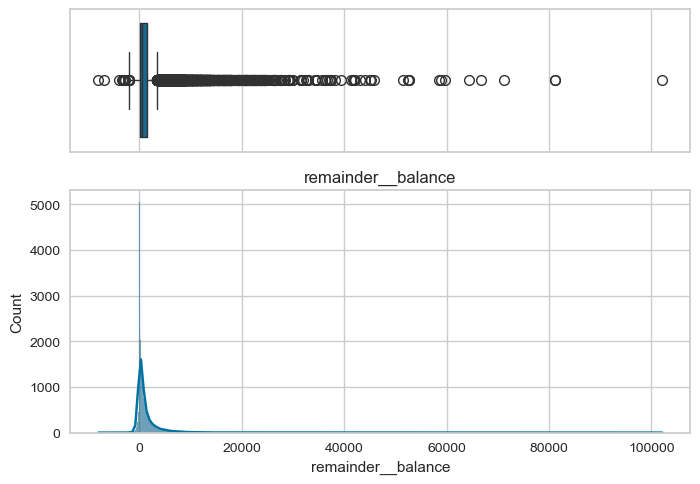

In [133]:
plot_boxplot_and_hist(X_train_imp, "remainder__balance")

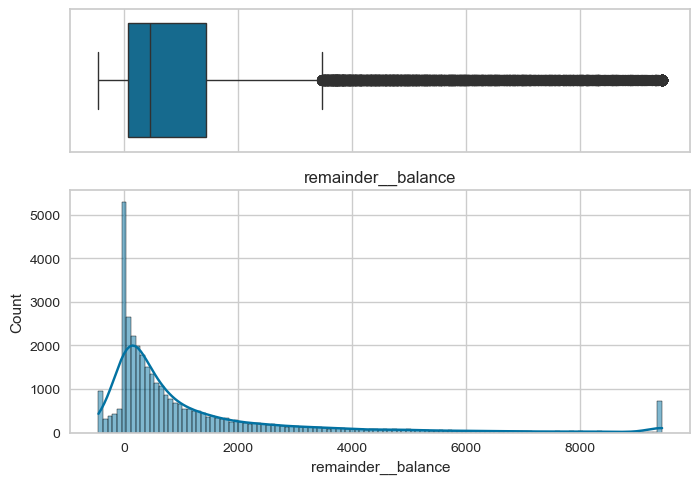

In [132]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__balance")

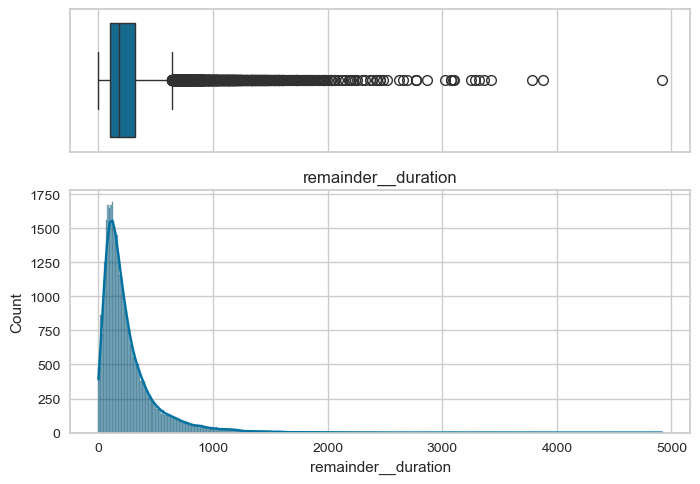

In [134]:
plot_boxplot_and_hist(X_train_imp, "remainder__duration")

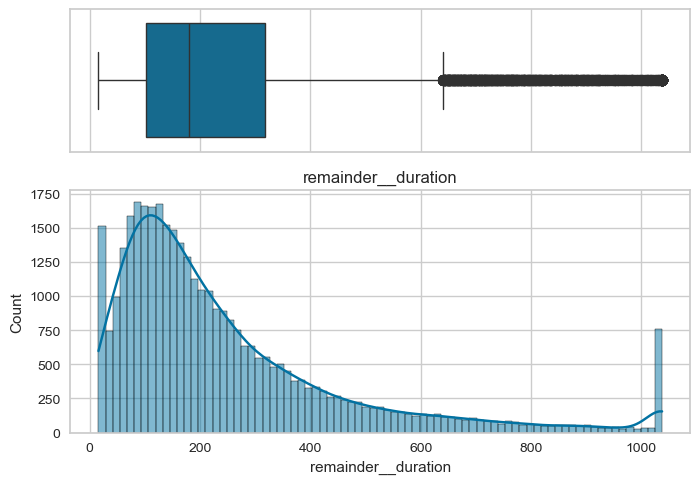

In [135]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__duration")

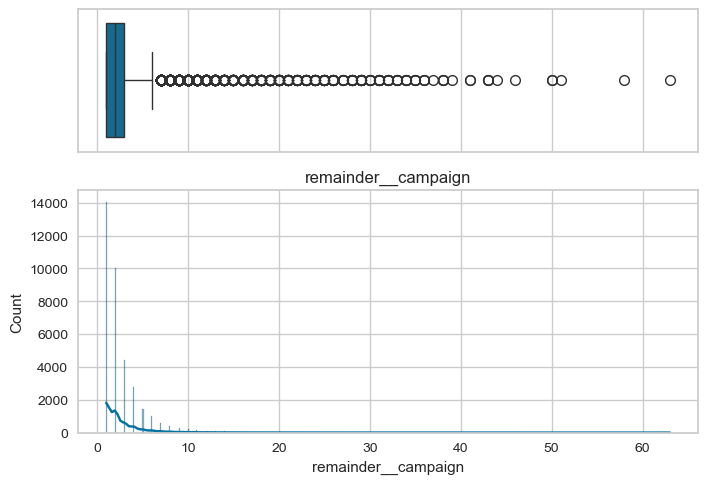

In [136]:
plot_boxplot_and_hist(X_train_imp, "remainder__campaign")

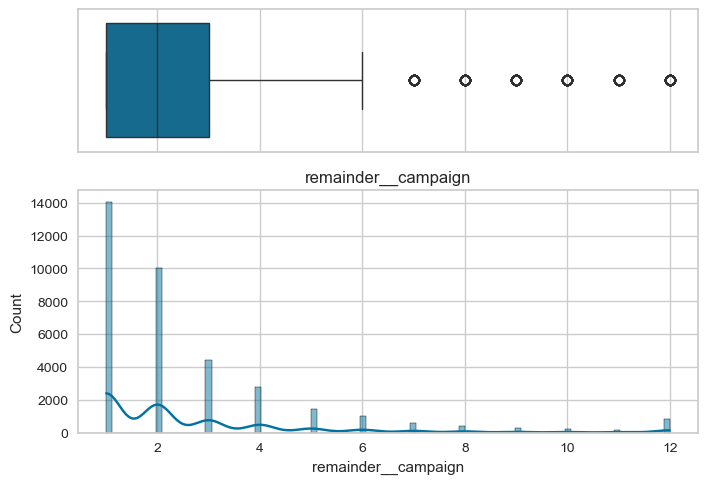

In [137]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__campaign")

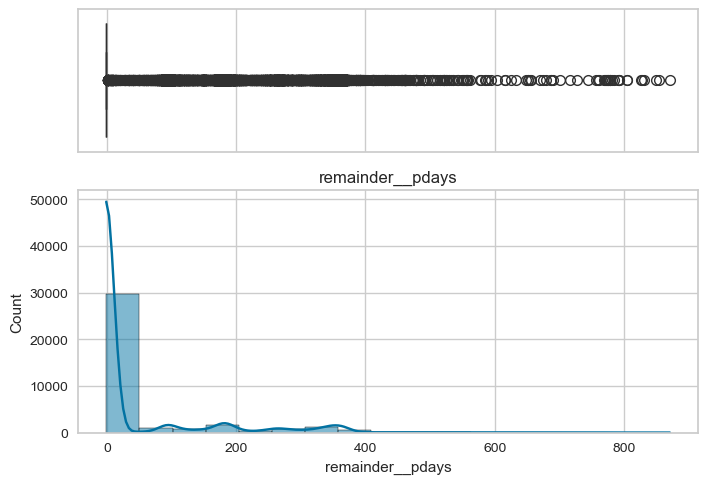

In [138]:
plot_boxplot_and_hist(X_train_imp, "remainder__pdays")

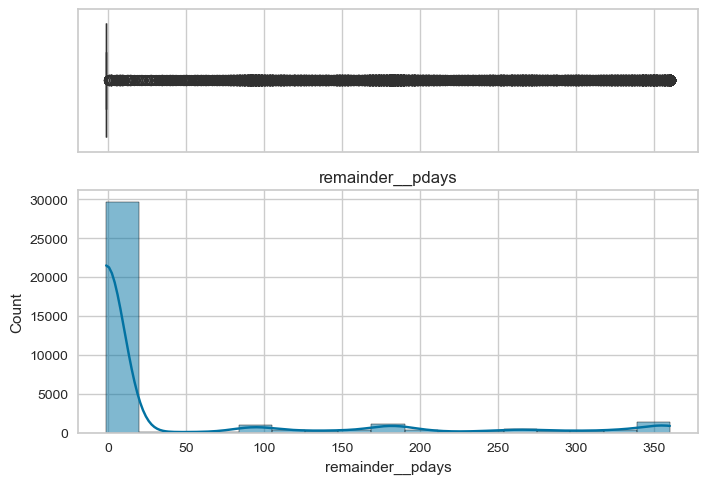

In [139]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__pdays")

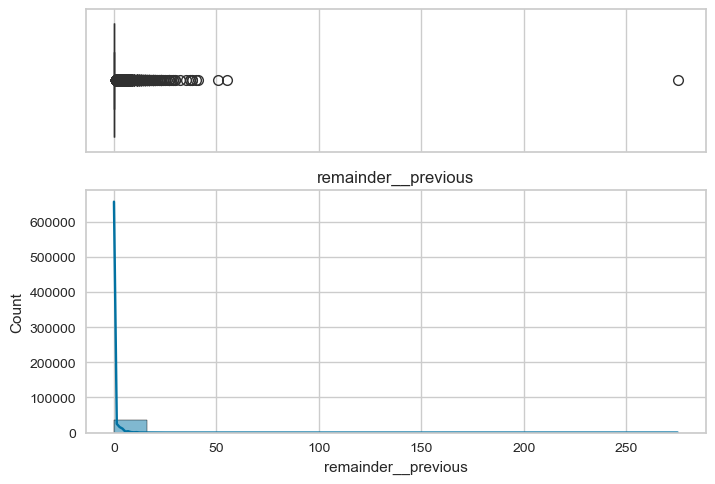

In [140]:
plot_boxplot_and_hist(X_train_imp, "remainder__previous")

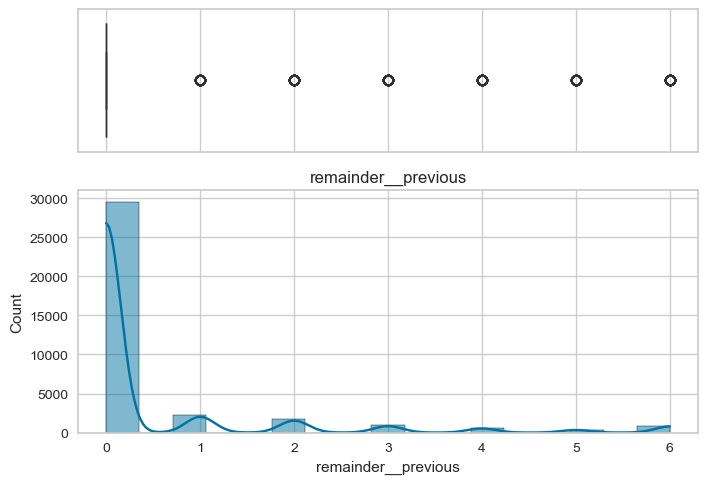

In [141]:
plot_boxplot_and_hist(X_train_imp_enc, "remainder__previous")

## Creating New Features

### Numerical Features

1. Apply a power transformation using the Yeo-Johnson formulation (since it generalises the Box-Cox fromulation to cover negative values). This transformation works well with age and duration. day_of_week didnt change much from applying these transfromation. So we apply the transformation to only these three features going forward. 
2. For the other numeric features we apply discretization techniques to handle the outliers that might exist and create simple features 
3. For day of week, added a cyclical feature, separate 7 days a week feature

In [142]:

# initialize the transformer with box-cox

transformer = PowerTransformer(method="yeo-johnson", standardize=False)

transformer.set_output(transform="pandas")
transformer.fit(X_train_imp_enc[numeric_features_imp])

X_tf = transformer.transform(X_train_imp_enc[numeric_features_imp])

X_tf.head()

remainder__age  remainder__balance  remainder__day_of_week  \
3344         2.641830          294.955129                8.467276   
17965        2.723654          447.271016               14.262062   
18299        2.653038         1008.703027               14.613068   
10221        2.593571         -246.621246                6.669101   
32192        2.783314          934.566383                8.467276   

       remainder__duration  remainder__campaign  remainder__pdays  \
3344              5.778450             0.490316         -1.950233   
17965             8.300334             0.647837         -1.950233   
18299             6.852051             0.770277         -1.950233   
10221             9.011285             0.873044         -1.950233   
32192             8.261128             0.647837         -1.950233   

       remainder__previous  
3344                  -0.0  
17965                 -0.0  
18299                 -0.0  
10221                 -0.0  
32192                 -0.0

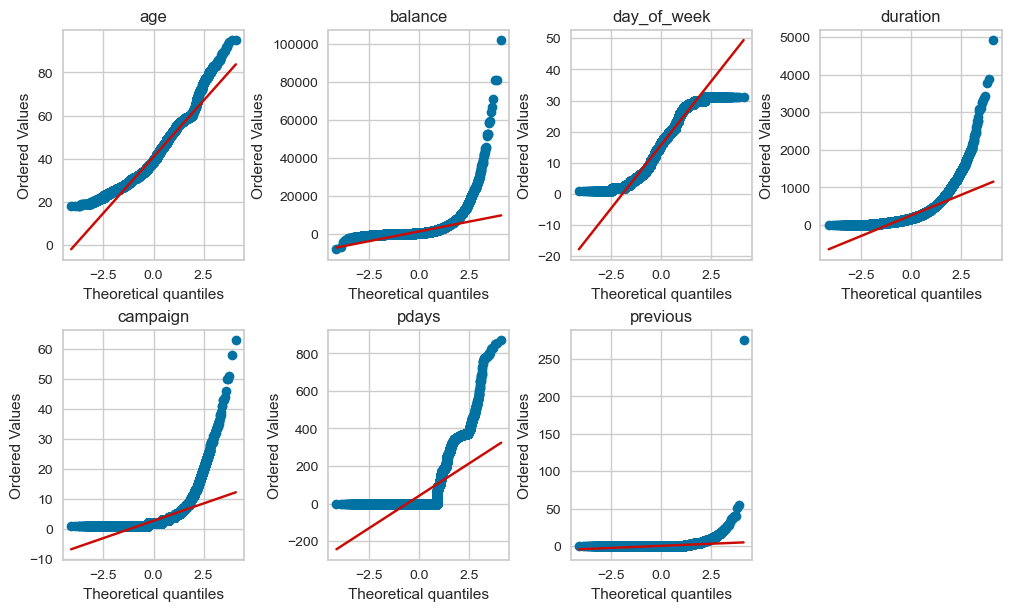

In [149]:
# original data before transformation and outlier capping
make_qqplot(X_train, numeric_features)

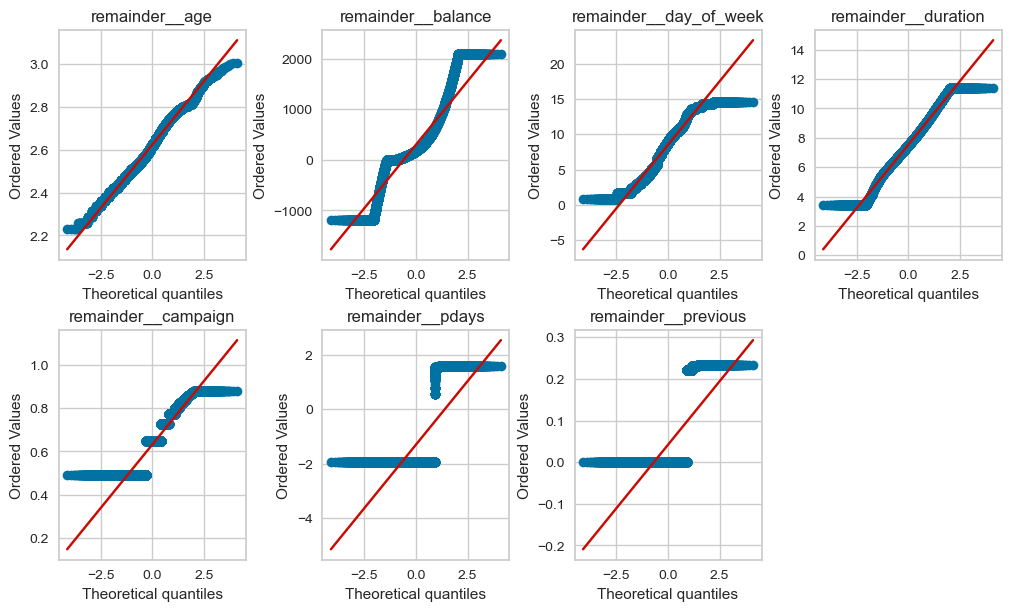

In [143]:
make_qqplot(X_tf, numeric_features_imp)

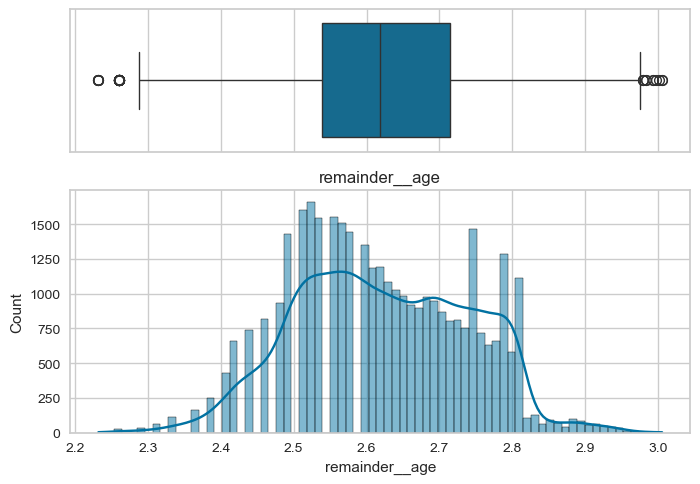

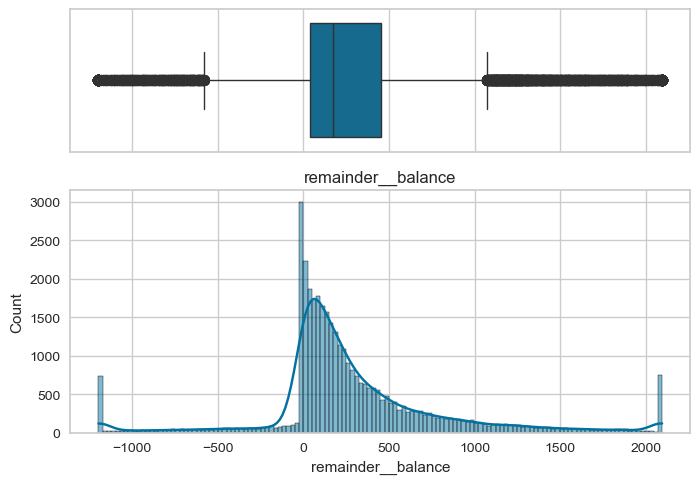

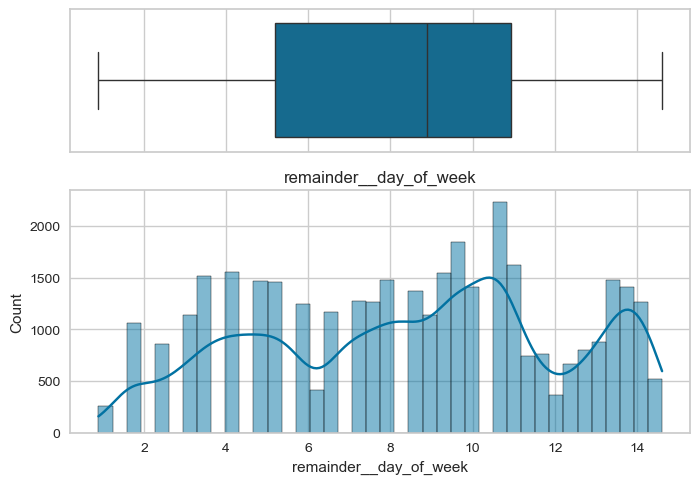

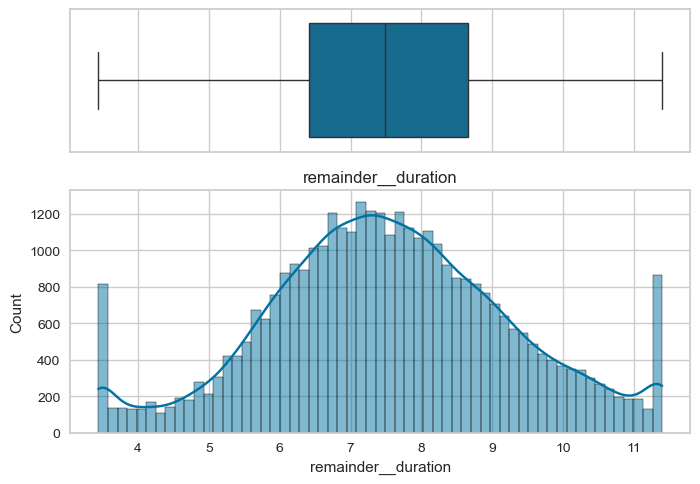

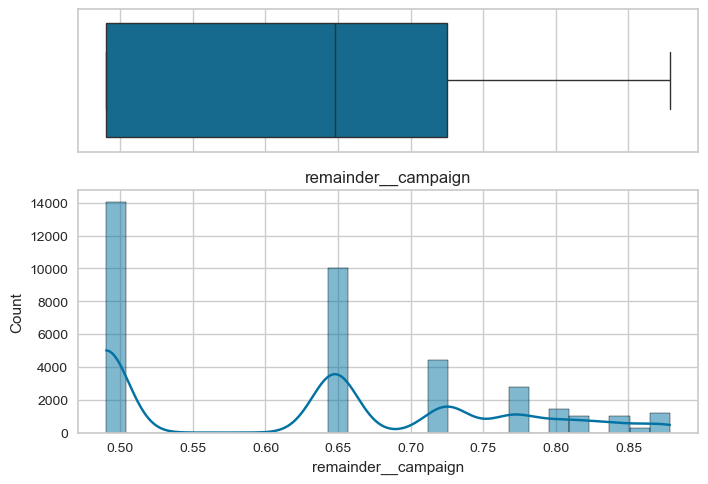

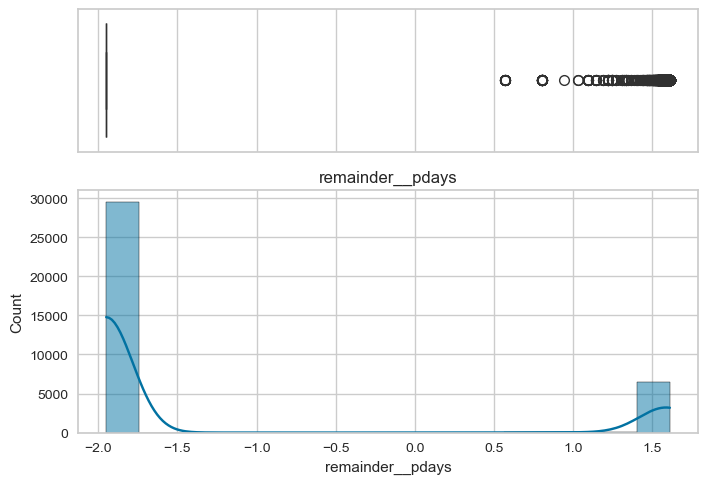

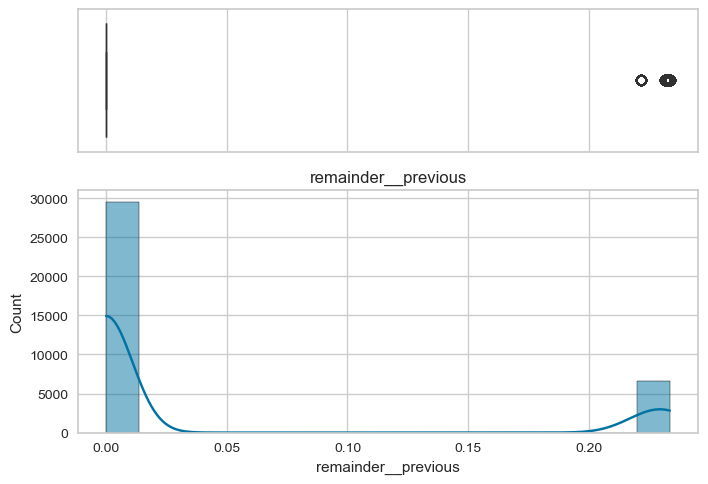

In [144]:
for variable in numeric_features_imp:
    plot_boxplot_and_hist(X_tf, variable)

<Axes: xlabel='remainder__campaign'>

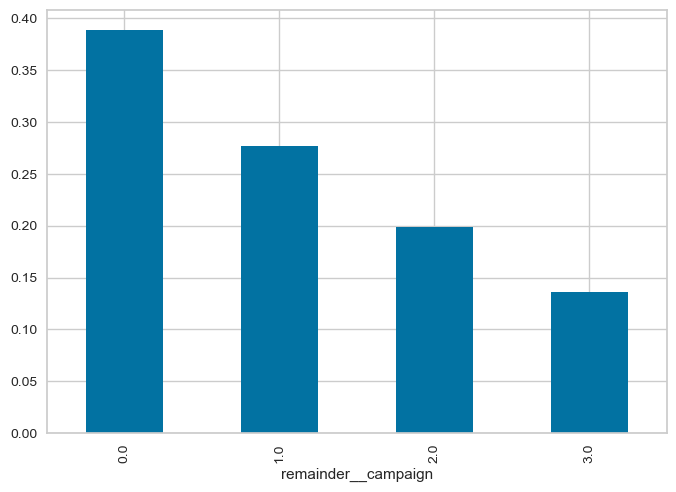

In [145]:

# differen bins and strategies were tried and the best one was chosen to give the value spread
disc = KBinsDiscretizer(
    n_bins=4,
    encode="ordinal",
    strategy="uniform",
    subsample=None,
)

disc.set_output(transform="pandas")

disc.fit(X_tf[["remainder__campaign"]])
train_t = disc.transform(X_tf[["remainder__campaign"]])
t1 = train_t["remainder__campaign"].value_counts(normalize=True).sort_index()
t1.plot.bar()

<Axes: xlabel='remainder__duration'>

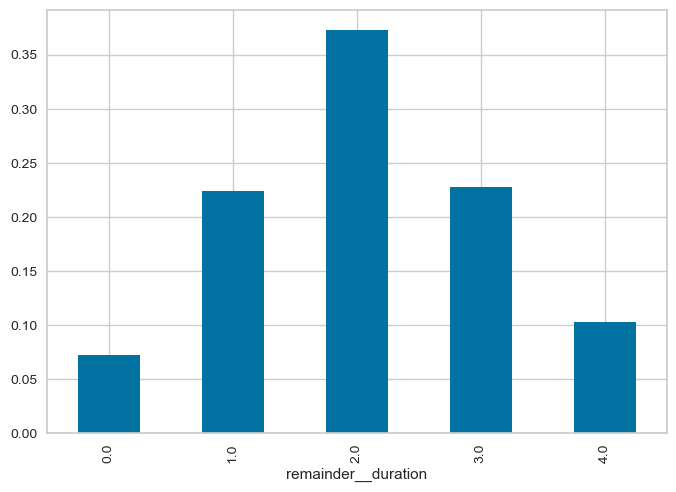

In [152]:
# differen bins and strategies were tried and the best one was chosen to give the value spread
disc = KBinsDiscretizer(
    n_bins=5,
    encode="ordinal",
    strategy="uniform",
    subsample=None,
)

disc.set_output(transform="pandas")

disc.fit(X_tf[["remainder__duration"]])
train_t = disc.transform(X_tf[["remainder__duration"]])
t1 = train_t["remainder__duration"].value_counts(normalize=True).sort_index()
t1.plot.bar()

<Axes: xlabel='remainder__balance'>

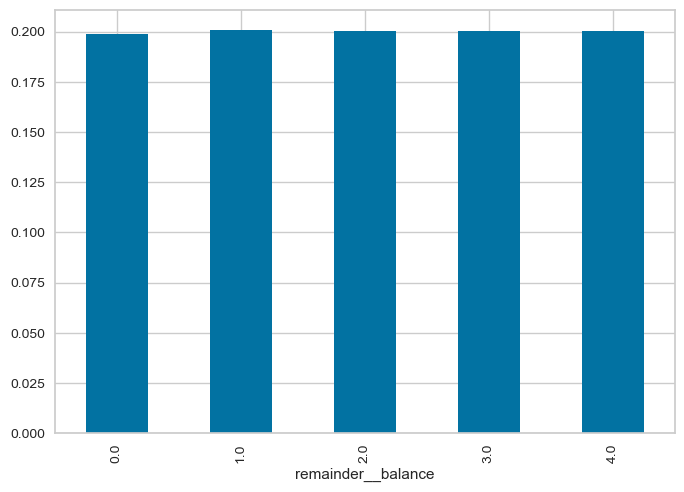

In [146]:
disc = KBinsDiscretizer(
    n_bins=5,
    encode="ordinal",
    strategy="quantile",
    subsample=None,
)

disc.set_output(transform="pandas")

disc.fit(X_tf[["remainder__balance"]])
train_t = disc.transform(X_tf[["remainder__balance"]])
t1 = train_t["remainder__balance"].value_counts(normalize=True).sort_index()
t1.plot.bar()

<Axes: xlabel='remainder__pdays'>

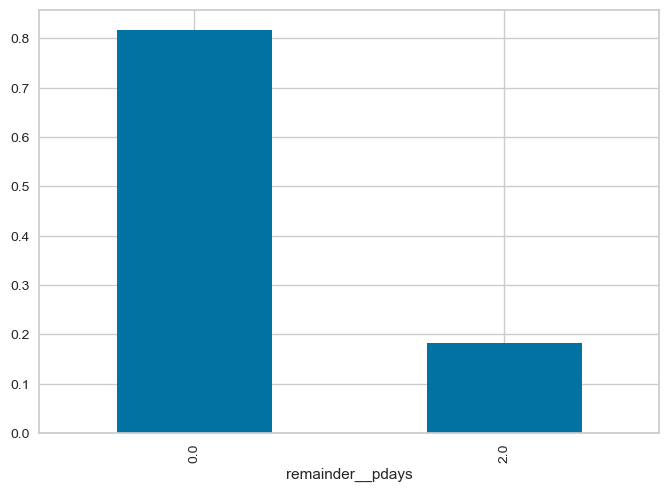

In [147]:
disc = KBinsDiscretizer(
    n_bins=3,
    encode="ordinal",
    strategy="uniform",
    subsample=None,
)

disc.set_output(transform="pandas")

disc.fit(X_tf[["remainder__pdays"]])
train_t = disc.transform(X_tf[["remainder__pdays"]])
t1 = train_t["remainder__pdays"].value_counts(normalize=True).sort_index()
t1.plot.bar()

<Axes: xlabel='remainder__previous'>

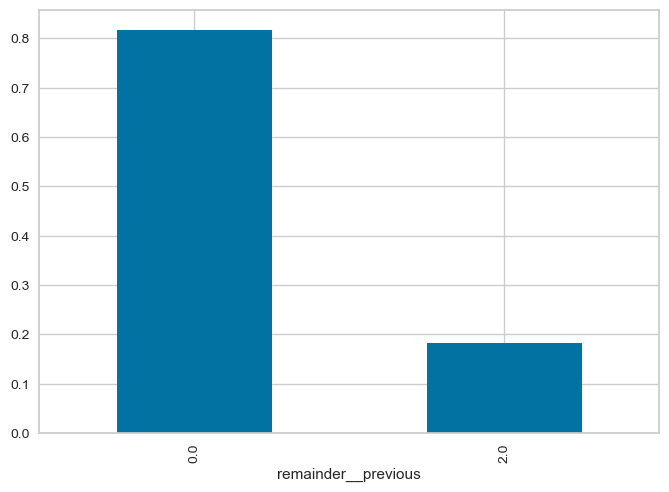

In [148]:
disc = KBinsDiscretizer(
    n_bins=3,
    encode="ordinal",
    strategy="uniform",
    subsample=None,
)

disc.set_output(transform="pandas")

disc.fit(X_tf[["remainder__previous"]])
train_t = disc.transform(X_tf[["remainder__previous"]])
t1 = train_t["remainder__previous"].value_counts(normalize=True).sort_index()
t1.plot.bar()

<Axes: xlabel='day_of_week'>

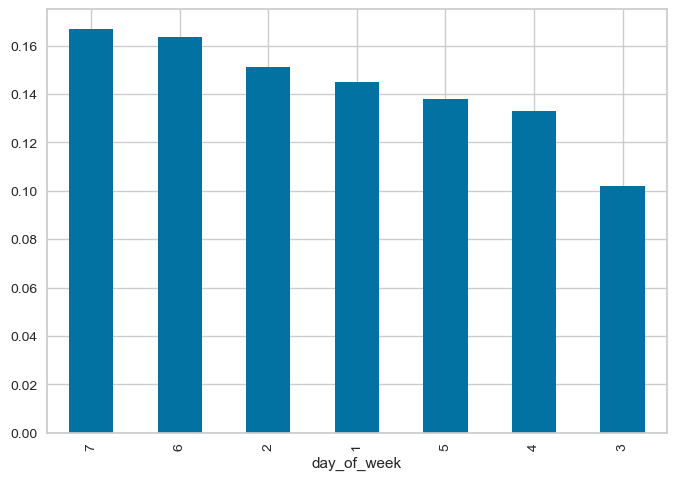

In [37]:
# create a feature for days in a week
sd = X_train[["day_of_week"]].apply(lambda x: ((x - 1) % 7) + 1)
sd["day_of_week"].value_counts(normalize=True).plot.bar()

<Axes: xlabel='day_of_week'>

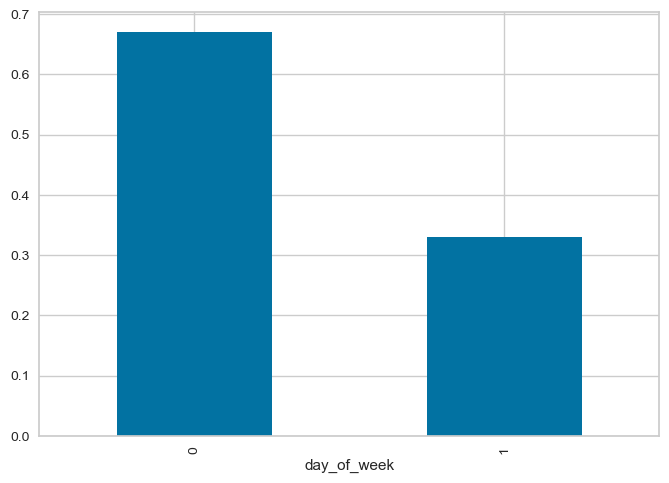

In [38]:
# create a feature for weekend
sd["day_of_week"].isin([6, 7]).astype(int).value_counts(normalize=True).plot.bar()

In [39]:
sd["day_of_week_sin"] = np.sin(sd["day_of_week"] / sd["day_of_week"].max() * 2 * np.pi)


# Transform day_of_week with cosine.
sd["day_of_week_cos"] = np.cos(sd["day_of_week"] / sd["day_of_week"].max() * 2 * np.pi)
# sd["day_of_week_sin"].plot.bar()

In [40]:
from sklearn.preprocessing import KBinsDiscretizer


class CustomFeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Assume X is a DataFrame
        X = X.copy()

        # X["is_unemployed"] = (
        #     X["job"].isin(["unemployed", "student", "retired"]).astype(int)
        # )
        # X["is_married"] = (X["marital"] == "married").astype(int)
        X["day"] = X["day_of_week"].apply(lambda x: ((x - 1) % 7) + 1).astype(int)
        X["day_of_week_sin"] = np.sin(
            X["day_of_week"] / X["day_of_week"].max() * 2 * np.pi
        )
        X["day_of_week_cos"] = np.cos(
            X["day_of_week"] / X["day_of_week"].max() * 2 * np.pi
        )
        X["day_sin"] = np.sin(X["day"] / X["day"].max() * 2 * np.pi)
        X["day_cos"] = np.cos(X["day"] / X["day"].max() * 2 * np.pi)

        X["is_weekend"] = X["day_of_week"].isin([6, 7]).astype(int)
        # Map each month to its respective quarter
        # month_to_quarter = {
        #     "jan": "1st quarter",
        #     "feb": "1st quarter",
        #     "mar": "1st quarter",
        #     "apr": "2nd quarter",
        #     "may": "2nd quarter",
        #     "jun": "2nd quarter",
        #     "jul": "3rd quarter",
        #     "aug": "3rd quarter",
        #     "sep": "3rd quarter",
        #     "oct": "4th quarter",
        #     "nov": "4th quarter",
        #     "dec": "4th quarter",
        # }

        # X["quarter"] = X["month"].map(month_to_quarter)

        return X

### Categorical features

1. Combine married into two groups
2. months
3. jobs


<Axes: xlabel='month'>

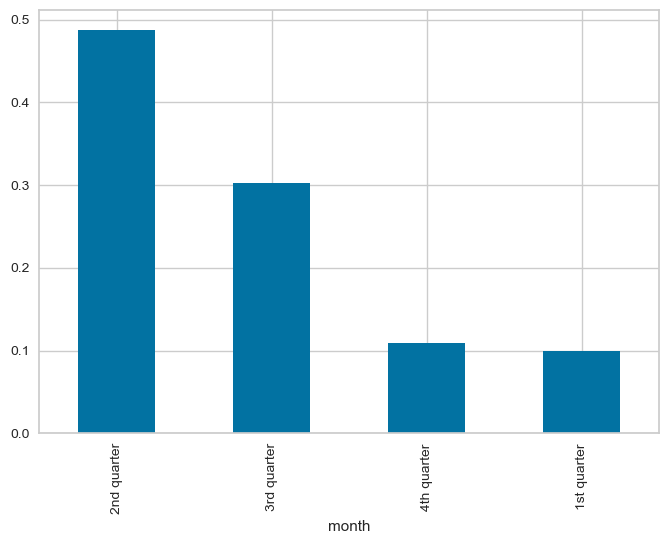

In [41]:
# create quarter feature
month_to_quarter = {
    "jan": "1st quarter",
    "feb": "1st quarter",
    "mar": "1st quarter",
    "apr": "2nd quarter",
    "may": "2nd quarter",
    "jun": "2nd quarter",
    "jul": "3rd quarter",
    "aug": "3rd quarter",
    "sep": "3rd quarter",
    "oct": "4th quarter",
    "nov": "4th quarter",
    "dec": "4th quarter",
}
Q1 = X_train["month"].map(month_to_quarter)
Q1.value_counts(normalize=True).plot.bar()

<Axes: xlabel='month'>

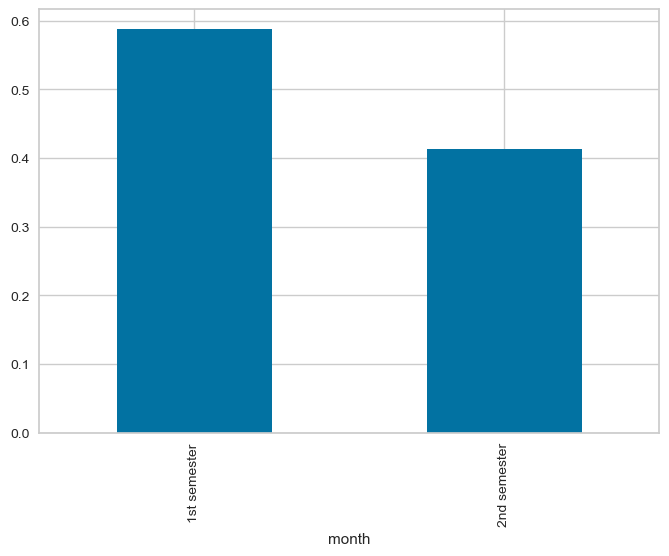

In [42]:
# create semester feature
month_to_semester = {
    "jan": "1st semester",
    "feb": "1st semester",
    "mar": "1st semester",
    "apr": "1st semester",
    "may": "1st semester",
    "jun": "1st semester",
    "jul": "2nd semester",
    "aug": "2nd semester",
    "sep": "2nd semester",
    "oct": "2nd semester",
    "nov": "2nd semester",
    "dec": "2nd semester",
}

Q1 = X_train["month"].map(month_to_semester)
Q1.value_counts(normalize=True).plot.bar()

<Axes: xlabel='marital'>

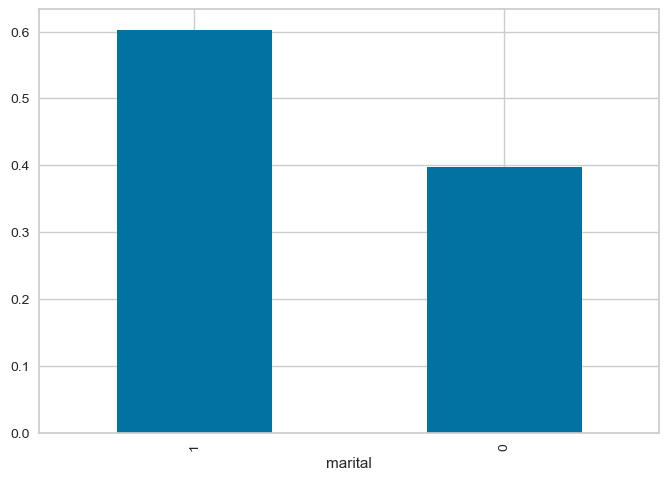

In [43]:
# create a feature for married or not married
(X_train["marital"] == "married").astype(int).value_counts(normalize=True).plot.bar()

In [44]:
job = X_train["job"].isin(["unemployed", "student", "retired"]).astype(int)
job.isnull().mean(), job.shape, X_train.shape

(0.0, (36168,), (36168, 16))

<Axes: xlabel='job'>

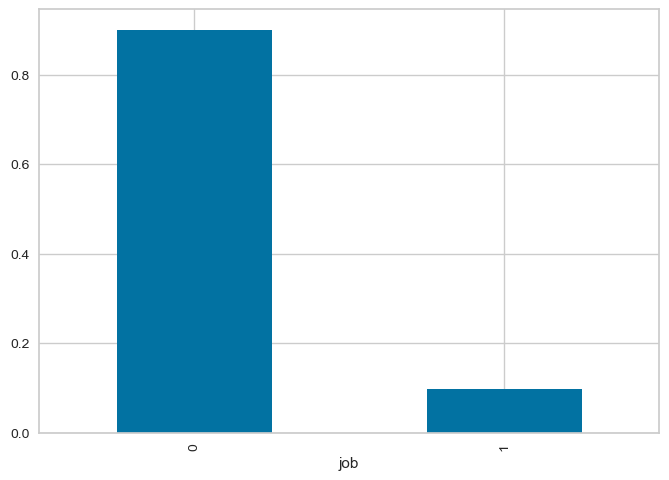

In [45]:
X_train["job"].isin(["unemployed", "student", "retired"]).astype(int).value_counts(
    normalize=True
).plot.bar()

In [5]:
class CustomFeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Assume X is a DataFrame
        X = X.copy()

        # X["is_unemployed"] = (
        #     X["job"].isin(["unemployed", "student", "retired"]).astype(int)
        # )
        X["is_married"] = (X["marital"] == "married").astype(int)
        X["day"] = X["day_of_week"].apply(lambda x: ((x - 1) % 7) + 1).astype(int)
        X["day_of_week_sin"] = np.sin(
            X["day_of_week"] / X["day_of_week"].max() * 2 * np.pi
        )
        X["day_of_week_cos"] = np.cos(
            X["day_of_week"] / X["day_of_week"].max() * 2 * np.pi
        )
        X["day_sin"] = np.sin(X["day"] / X["day"].max() * 2 * np.pi)
        X["day_cos"] = np.cos(X["day"] / X["day"].max() * 2 * np.pi)

        X["is_weekend"] = X["day_of_week"].isin([6, 7]).astype(int)
        # Map each month to its respective quarter
        month_to_quarter = {
            "jan": "1st quarter",
            "feb": "1st quarter",
            "mar": "1st quarter",
            "apr": "2nd quarter",
            "may": "2nd quarter",
            "jun": "2nd quarter",
            "jul": "3rd quarter",
            "aug": "3rd quarter",
            "sep": "3rd quarter",
            "oct": "4th quarter",
            "nov": "4th quarter",
            "dec": "4th quarter",
        }

        X["quarter"] = X["month"].map(month_to_quarter)

        month_to_semester = {
            "jan": "1st semester",
            "feb": "1st semester",
            "mar": "1st semester",
            "apr": "1st semester",
            "may": "1st semester",
            "jun": "1st semester",
            "jul": "2nd semester",
            "aug": "2nd semester",
            "sep": "2nd semester",
            "oct": "2nd semester",
            "nov": "2nd semester",
            "dec": "2nd semester",
        }

        X["semester"] = X["month"].map(month_to_semester)

        month_to_num = {
            "jan": 1,
            "feb": 2,
            "mar": 3,
            "apr": 4,
            "may": 5,
            "jun": 6,
            "jul": 7,
            "aug": 8,
            "sep": 9,
            "oct": 10,
            "nov": 11,
            "dec": 12,
        }

        X["month"] = X["month"].map(month_to_num)

        X["month_sin"] = np.sin(X["month"] / X["month"].max() * 2 * np.pi)
        X["month_cos"] = np.cos(X["month"] / X["month"].max() * 2 * np.pi)
        return X

### Pipeline for feature engineering

In [7]:
new_catergorical_features = ["quarter", "semester", "loan", "default", "housing"]

numeric_transformer = Pipeline(
    steps=[
        ("imputer", PowerTransformer(method="yeo-johnson", standardize=False)),
        (
            "scaler",
            StandardScaler(),
        ),  # Standardize features by removing the mean and scaling to unit variance
    ]
)
pipe_cat1 = Pipeline(
    [
        ("s_imputer", SimpleImputer(strategy="most_frequent", add_indicator=True)),
        (("s_ohe", OneHotEncoder(sparse_output=False, handle_unknown="error"))),
    ]
)

pipe_cat2 = Pipeline(
    [
        ("l_imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        (("l_ohe", OneHotEncoder(sparse_output=False, handle_unknown="error"))),
    ]
)


feature_transformer = ColumnTransformer(
    [
        ("trans_s", pipe_cat1, ["job", "education"]),
        ("trans_l", pipe_cat2, ["contact", "poutcome"]),
        (
            "num_discretizer1",
            KBinsDiscretizer(
                n_bins=4,
                encode="onehot-dense",
                strategy="uniform",
                subsample=None,
            ),
            ["campaign"],
        ),
        (
            "num_discretizer2",
            KBinsDiscretizer(
                n_bins=5,
                encode="onehot-dense",
                strategy="quantile",
                subsample=None,
            ),
            ["balance"],
        ),
        (
            "num_discretizer3",
            KBinsDiscretizer(
                n_bins=3,
                encode="onehot-dense",
                strategy="uniform",
                subsample=None,
            ),
            ["pdays"],
        ),
        (
            "num_discretizer4",
            KBinsDiscretizer(
                n_bins=3,
                encode="onehot-dense",
                strategy="uniform",
                subsample=None,
            ),
            ["previous"],
        ),
        # (
        #     "num_discretizer5",
        #     KBinsDiscretizer(
        #         n_bins=3,
        #         encode="onehot-dense",
        #         strategy="uniform",
        #         subsample=None,
        #     ),
        #     ["duration"],
        # ),
        (
            "num_power",
            numeric_transformer,
            ["age", "duration", "day_of_week"],
        ),
        (
            "cat",
            OneHotEncoder(sparse_output=False, handle_unknown="error"),
            new_catergorical_features,
        ),
        ("transformed", "drop", ["marital"]),  # drop these features
    ],
    remainder="passthrough",
).set_output(transform="pandas")

capper = Winsorizer(
    variables=[
        "balance",
        "duration",
        "campaign",
        "pdays",
        "previous",
    ],
    capping_method="quantiles",
    tail="both",
    fold=0.02,
)

feature_engineering_pipeline = Pipeline(
    steps=[
        ("capping", capper),  # capping
        ("feature_creation", CustomFeatureCreator()),  # create feature
        ("feature_transform", feature_transformer),  # transform features
    ]
)

feature_engineering_pipeline.fit(X_train)
label_encoder = LabelEncoder().fit(y_train)

X_train_imp_num_cat = feature_engineering_pipeline.transform(X_train)
y_train_transformed = label_encoder.transform(y_train)

X_test_imp_num_cat = feature_engineering_pipeline.transform(X_test)
y_test_transformed = label_encoder.transform(y_test)

X_train_imp_num_cat.head()

trans_s__job_admin.  trans_s__job_blue-collar  \
3344                   0.0                       1.0   
17965                  0.0                       0.0   
18299                  1.0                       0.0   
10221                  0.0                       0.0   
32192                  0.0                       1.0   

       trans_s__job_entrepreneur  trans_s__job_housemaid  \
3344                         0.0                     0.0   
17965                        0.0                     0.0   
18299                        0.0                     0.0   
10221                        0.0                     0.0   
32192                        0.0                     0.0   

       trans_s__job_management  trans_s__job_retired  \
3344                       0.0                   0.0   
17965                      0.0                   0.0   
18299                      0.0                   0.0   
10221                      1.0                   0.0   
32192                      0.0                   0.0   

       trans_s__job_self-employed  trans_s__job_services  \
3344                          0.0                    0.0   
17965                         0.0                    0.0   
18299                         0.0                    0.0   
10221                         0.0                    0.0   
32192                         0.0                    0.0   

       trans_s__job_student  trans_s__job_technician  ...  remainder__month  \
3344                    0.0                      0.0  ...                 5   
17965                   0.0                      1.0  ...                 7   
18299                   0.0                      0.0  ...                 7   
10221                   0.0                      0.0  ...                 6   
32192                   0.0                      0.0  ...                 4   

       remainder__is_married  remainder__day  remainder__day_of_week_sin  \
3344                       1               1                1.011683e-01   
17965                      1               2               -2.012985e-01   
18299                      1               3               -2.449294e-16   
10221                      0               4                7.907757e-01   
32192                      1               1                1.011683e-01   

       remainder__day_of_week_cos  remainder__day_sin  remainder__day_cos  \
3344                    -0.994869            0.781831            0.623490   
17965                    0.979530            0.974928           -0.222521   
18299                    1.000000            0.433884           -0.900969   
10221                   -0.612106           -0.433884           -0.900969   
32192                   -0.994869            0.781831            0.623490   

       remainder__is_weekend  remainder__month_sin  remainder__month_cos  
3344                       0          5.000000e-01             -0.866025  
17965                      0         -5.000000e-01             -0.866025  
18299                      0         -5.000000e-01             -0.866025  
10221                      0          1.224647e-16             -1.000000  
32192                      0          8.660254e-01             -0.500000  

[5 rows x 65 columns]

In [168]:
X_test_imp_num_cat.head()

trans_s__job_admin.  trans_s__job_blue-collar  \
3776                   0.0                       1.0   
9928                   0.0                       0.0   
33409                  0.0                       0.0   
31885                  0.0                       0.0   
15738                  0.0                       0.0   

       trans_s__job_entrepreneur  trans_s__job_housemaid  \
3776                         0.0                     0.0   
9928                         0.0                     0.0   
33409                        0.0                     0.0   
31885                        0.0                     0.0   
15738                        0.0                     0.0   

       trans_s__job_management  trans_s__job_retired  \
3776                       0.0                   0.0   
9928                       0.0                   0.0   
33409                      0.0                   0.0   
31885                      1.0                   0.0   
15738                      1.0                   0.0   

       trans_s__job_self-employed  trans_s__job_services  \
3776                          0.0                    0.0   
9928                          0.0                    1.0   
33409                         0.0                    0.0   
31885                         0.0                    0.0   
15738                         0.0                    0.0   

       trans_s__job_student  trans_s__job_technician  ...  remainder__month  \
3776                    0.0                      0.0  ...                 5   
9928                    0.0                      0.0  ...                 6   
33409                   1.0                      0.0  ...                 4   
31885                   0.0                      0.0  ...                 4   
15738                   0.0                      0.0  ...                 7   

       remainder__is_married  remainder__day  remainder__day_of_week_sin  \
3776                       1               2                   -0.101168   
9928                       0               2                    0.968077   
33409                      0               6                   -0.790776   
31885                      1               2                    0.968077   
15738                      1               7                   -0.897805   

       remainder__day_of_week_cos  remainder__day_sin  remainder__day_cos  \
3776                    -0.994869        9.749279e-01           -0.222521   
9928                    -0.250653        9.749279e-01           -0.222521   
33409                   -0.612106       -7.818315e-01            0.623490   
31885                   -0.250653        9.749279e-01           -0.222521   
15738                   -0.440394       -2.449294e-16            1.000000   

       remainder__is_weekend  remainder__month_sin  remainder__month_cos  
3776                       0          5.000000e-01             -0.866025  
9928                       0          1.224647e-16             -1.000000  
33409                      0          8.660254e-01             -0.500000  
31885                      0          8.660254e-01             -0.500000  
15738                      0         -5.000000e-01             -0.866025  

[5 rows x 65 columns]

In [350]:
feature_transformer.get_feature_names_out()

array(['trans_s__job_admin.', 'trans_s__job_blue-collar',
       'trans_s__job_entrepreneur', 'trans_s__job_housemaid',
       'trans_s__job_management', 'trans_s__job_retired',
       'trans_s__job_self-employed', 'trans_s__job_services',
       'trans_s__job_student', 'trans_s__job_technician',
       'trans_s__job_unemployed', 'trans_s__education_primary',
       'trans_s__education_secondary', 'trans_s__education_tertiary',
       'trans_s__missingindicator_job_False',
       'trans_s__missingindicator_job_True',
       'trans_s__missingindicator_education_False',
       'trans_s__missingindicator_education_True',
       'trans_l__contact_cellular', 'trans_l__contact_missing',
       'trans_l__contact_telephone', 'trans_l__poutcome_failure',
       'trans_l__poutcome_missing', 'trans_l__poutcome_other',
       'trans_l__poutcome_success', 'num_discretizer1__campaign_0.0',
       'num_discretizer1__campaign_1.0', 'num_discretizer1__campaign_2.0',
       'num_discretizer1__campaign_3

In [155]:
# check to see if there are still missing values and categorical variables
X_train_imp_num_cat.select_dtypes(
    include=["object"]
).columns.to_list(), X_train_imp_num_cat.isnull().mean().any(), X_train_imp_num_cat.shape

([], False, (36168, 67))

In [50]:
X_test_imp_num_cat.select_dtypes(
    include=["object"]
).columns.to_list(), X_test_imp_num_cat.isnull().mean().any(), X_test_imp_num_cat.shape

([], False, (9043, 65))

## Visualizing Higher Dimensional Data

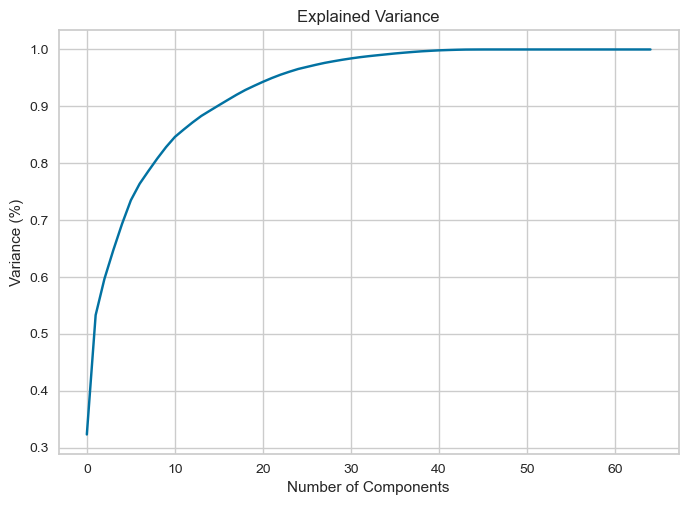

In [51]:
# Perform PCA
pca = PCA().fit(X_train_imp_num_cat)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")  # for each component
plt.title("Explained Variance")
plt.grid(True)
plt.show()

In [52]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = (
    np.argmax(cumulative_variance >= 0.95) + 1
)  # Adjust the threshold as necessary
print(f"Optimal number of components by 95% variance: {optimal_num_components}")

Optimal number of components by 95% variance: 23


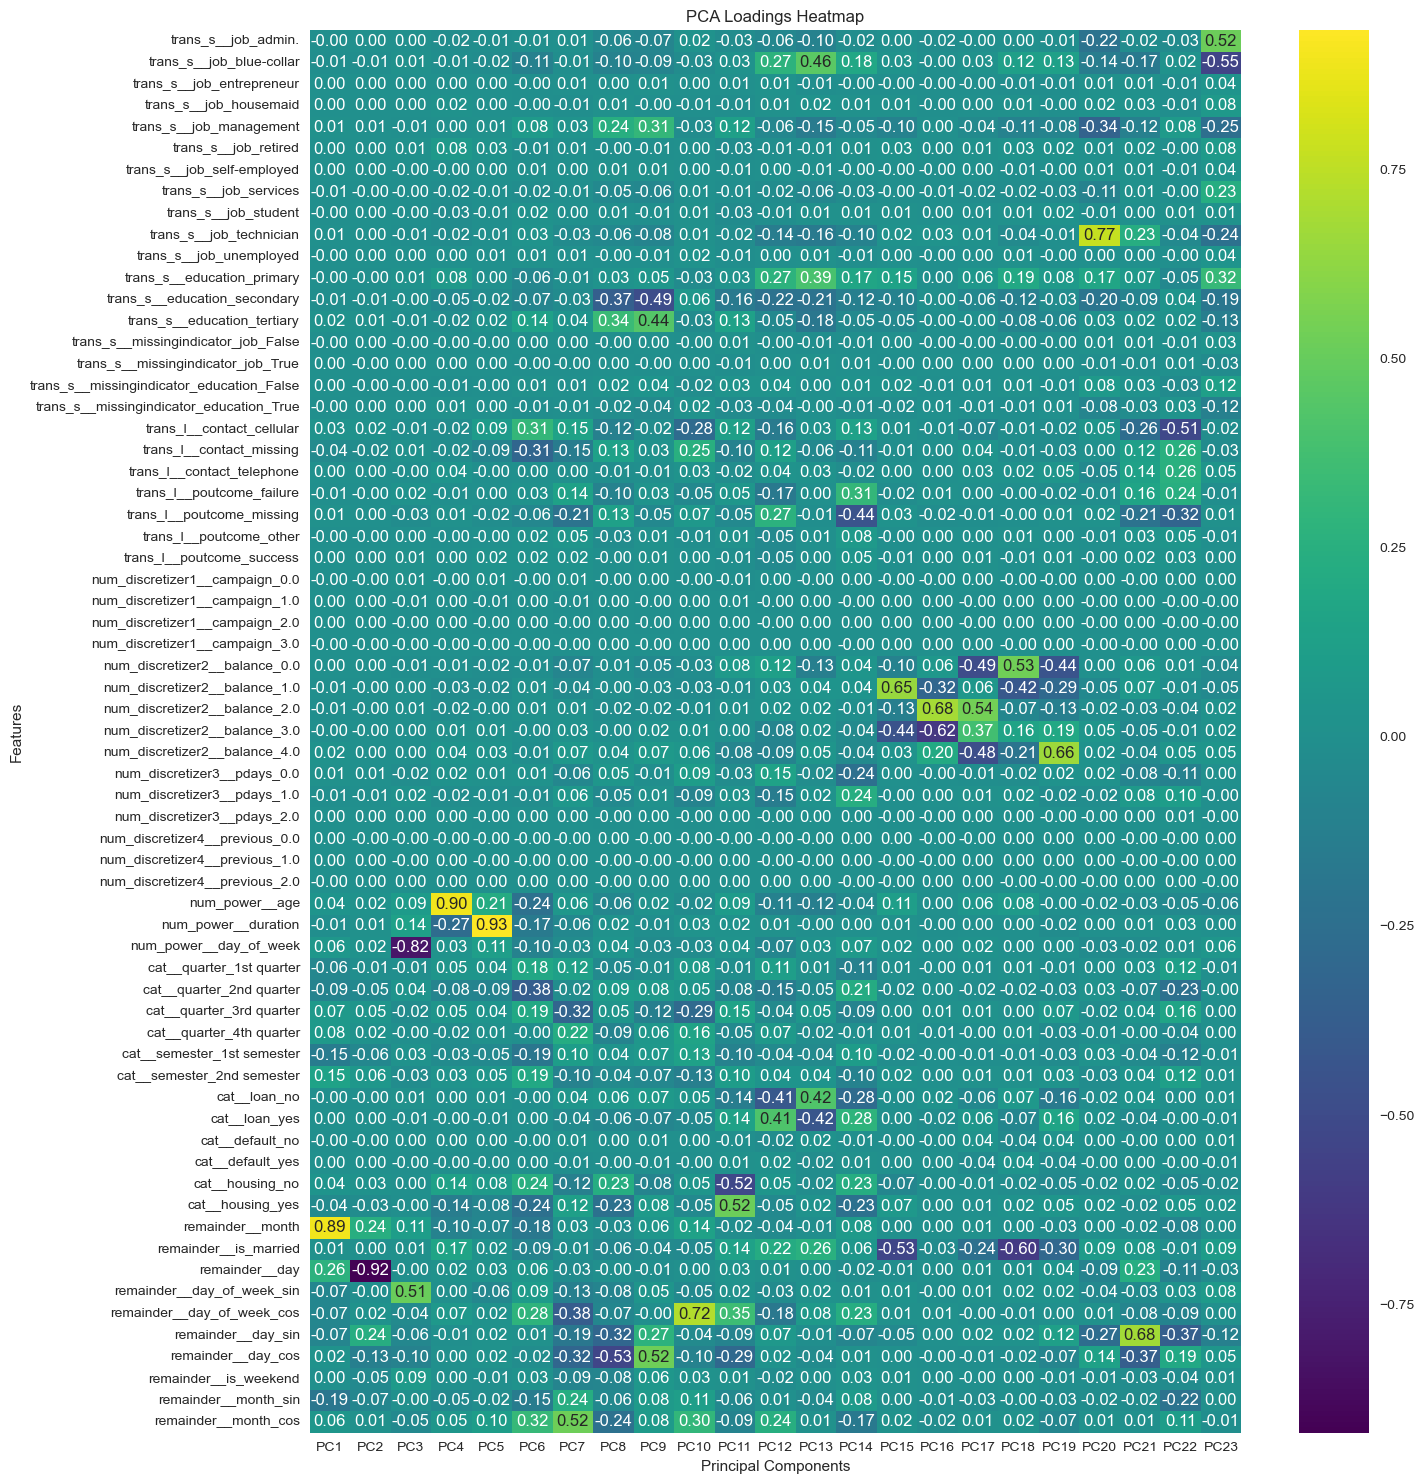

In [54]:
# Refit PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_num_components)
Train_X_pca = pca_optimal.fit_transform(X_train_imp_num_cat)
feature_names = feature_transformer.get_feature_names_out()

# Components
components = pca_optimal.components_

# Creating a DataFrame with loadings
components_df = pd.DataFrame(
    components.T,
    columns=[f"PC{i+1}" for i in range(components.shape[0])],
    index=feature_names,
)

plt.figure(figsize=(15, 15))
sns.heatmap(components_df, cmap="viridis", annot=True, fmt=".2f")
plt.title("PCA Loadings Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

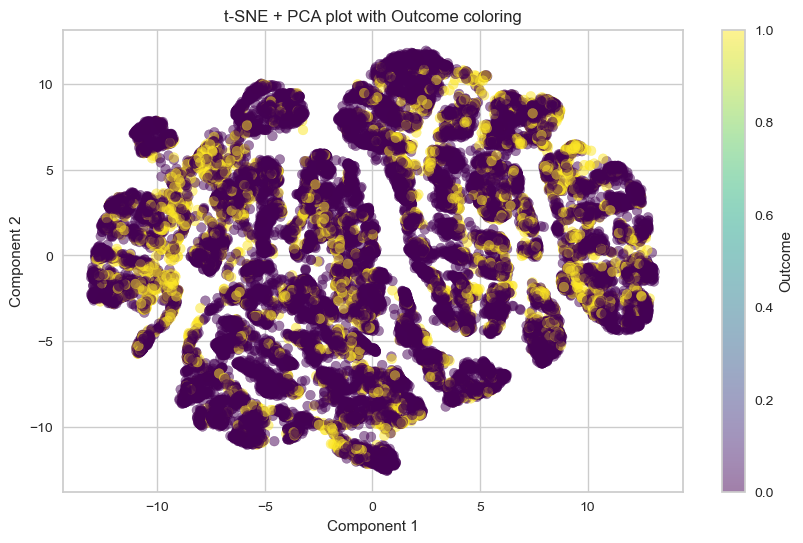

In [56]:

# It is common to reduce dimensionality with PCA before applying t-SNE for large datasets
# This is optional and depends on the size and nature of your data
# pca = PCA(n_components=50).fit_transform(Train_X_transformed)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
pca = PCA(n_components=optimal_num_components).fit_transform(X_train_imp_num_cat)
Train_X_tsne_pca = tsne.fit_transform(
    pca
)  # You can replace Train_X_transformed with pca if used above

# Plot the result
plt.figure(figsize=(10, 6))
plt.scatter(
    Train_X_tsne_pca[:, 0],
    Train_X_tsne_pca[:, 1],
    c=y_train_transformed,
    cmap="viridis",
    alpha=0.5,
)
plt.colorbar(label="Outcome")
plt.title("t-SNE + PCA plot with Outcome coloring")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

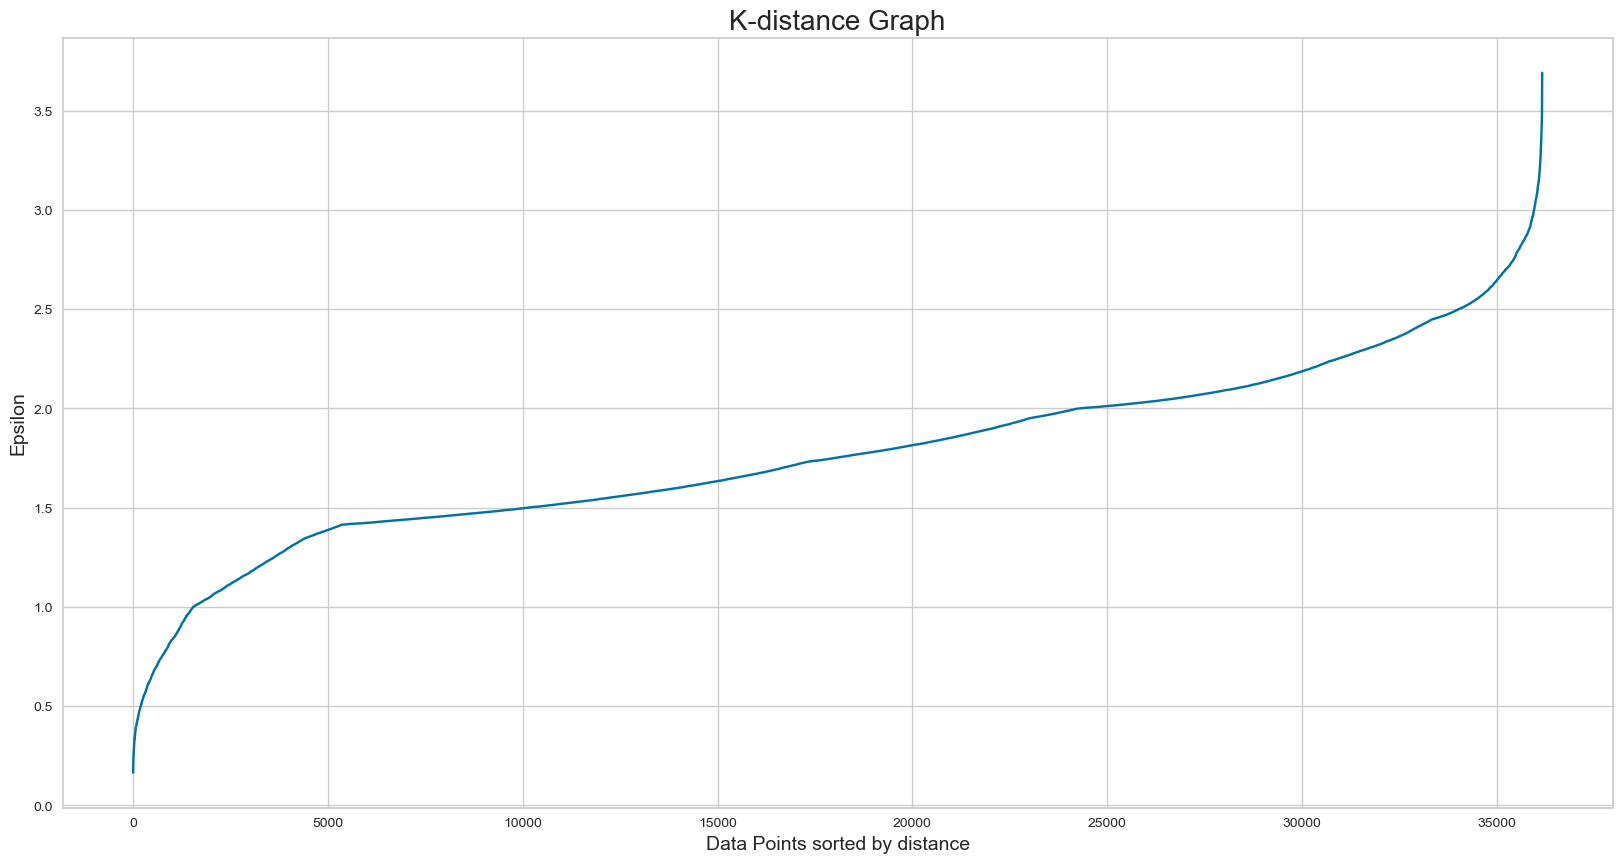

In [57]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_train_imp_num_cat)
distances, indices = nbrs.kneighbors(X_train_imp_num_cat)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:, 3]
plt.figure(figsize=(20, 10))
plt.plot(distances)
plt.title("K-distance Graph", fontsize=20)
plt.xlabel("Data Points sorted by distance", fontsize=14)
plt.ylabel("Epsilon", fontsize=14)
plt.show()

In [75]:
# Example parameters, might need adjustment based on the dataset
dbscan = DBSCAN(eps=2.7, min_samples=4)
clusters = dbscan.fit_predict(X_train_imp_num_cat)
print(f"Number of clusters: {len(np.unique(clusters))}")

Number of clusters: 4


In [80]:
np.unique(clusters), (y_train_transformed[clusters != -1] == 0).sum(), (
    y_train_transformed[clusters != -1] == 1
).sum(), (y_train_transformed[clusters == -1] == 0).sum(), (
    y_train_transformed[clusters == -1] == 1
).sum()

(array([-1,  0,  1,  2]), 31734, 4064, 236, 134)

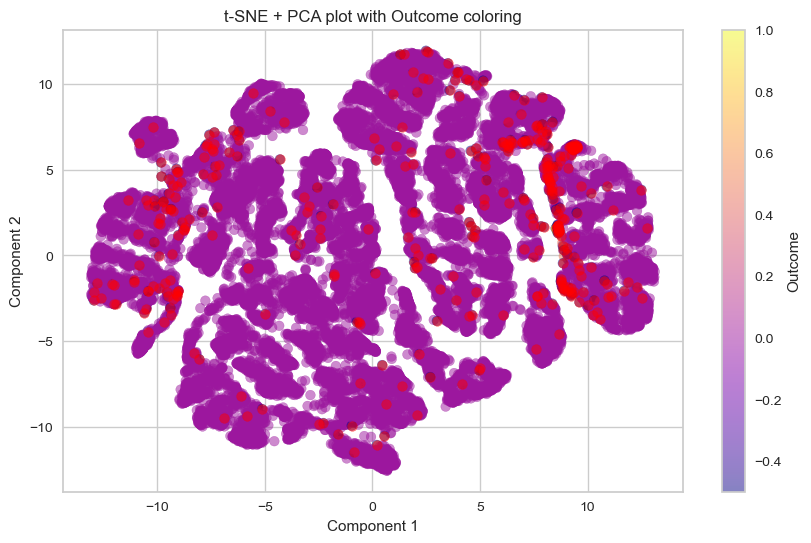

In [78]:
# Plot the result
plt.figure(figsize=(10, 6))
plt.scatter(
    Train_X_tsne_pca[:, 0],
    Train_X_tsne_pca[:, 1],
    c=clusters / clusters.max(),
    cmap="plasma",
    alpha=0.5,
)
plt.colorbar(label="Outcome")

plt.scatter(
    Train_X_tsne_pca[clusters == -1, 0],
    Train_X_tsne_pca[clusters == -1, 1],
    c="red",
    alpha=0.5,
)
plt.title("t-SNE + PCA plot with Outcome coloring")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## Feature Selection 
1. Using shuffling method

In [169]:


log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# rf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=2909, n_jobs=4)


sel = SelectByShuffling(
    variables=None,  # automatically examine all numerical variables
    estimator=log_reg_model,  # the ML model
    scoring="f1",  # the metric to evaluate
    threshold=None,  # the maximum performance drop allowed to select the feature
    cv=5,  # cross validation
    random_state=42,  # seed
)


sel.fit(X_train_imp_num_cat, y_train_transformed)

/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


SelectByShuffling(cv=5,
                  estimator=LogisticRegression(max_iter=1000, random_state=42),
                  random_state=42, scoring='f1')

In [170]:
# performance of model trained with all features

sel.initial_model_performance_

0.44254029565017533

<Axes: >

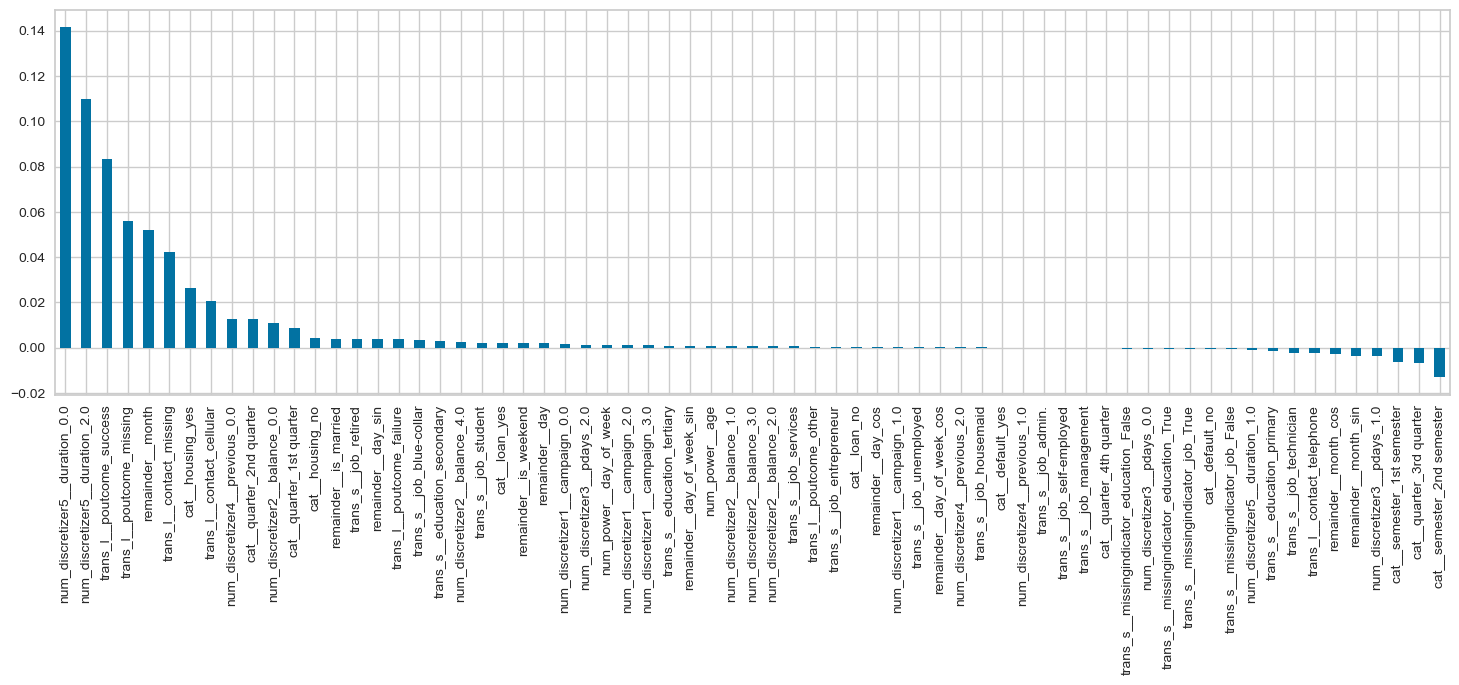

In [159]:
# drop in performance caused by shuffling the feature

# bar plot of the performance drops

pd.Series(sel.performance_drifts_).sort_values(ascending=False).plot.bar(
    figsize=(18, 5)
)

In [355]:
# features that will be removed

len(sel.features_to_drop_)

57

In [162]:
X_train_best = sel.transform(X_train_imp_num_cat)
X_test_best = sel.transform(X_test_imp_num_cat)

X_train_best.shape, X_test_best.shape

((36168, 12), (9043, 12))

In [163]:
# outcome for logistic regression
X_train_best.columns

Index(['trans_l__contact_cellular', 'trans_l__contact_missing',
       'trans_l__poutcome_missing', 'trans_l__poutcome_success',
       'num_discretizer2__balance_0.0', 'num_discretizer4__previous_0.0',
       'num_discretizer5__duration_0.0', 'num_discretizer5__duration_2.0',
       'cat__quarter_1st quarter', 'cat__quarter_2nd quarter',
       'cat__housing_yes', 'remainder__month'],
      dtype='object')

In [164]:
# Now let's build a random forests only with the selected features

log_reg_model.fit(X_train_best, y_train_transformed)

# print roc-auc in train_best and testing sets
print(
    "train_best auc score: ",
    f1_score(y_train_transformed, log_reg_model.predict(X_train_best)),
)
print(
    "test auc score: ",
    f1_score(y_test_transformed, log_reg_model.predict(X_test_best)),
)

train_best auc score:  0.41712750829514933
test auc score:  0.4099756690997567


### 2. Recursive feature elimination

In [165]:
sel = RecursiveFeatureElimination(
    variables=None,  # automatically evaluate all numerical variables
    estimator=log_reg_model,  # the ML model
    scoring="f1",  # the metric we want to evalute
    threshold=0.0005,  # the maximum performance drop allowed to remove a feature
    cv=2,  # cross-validation
)

sel.fit(X_train_imp_num_cat, y_train_transformed)

RecursiveFeatureElimination(cv=2,
                            estimator=LogisticRegression(max_iter=1000,
                                                         random_state=42),
                            scoring='f1', threshold=0.0005)

In [166]:
sel.initial_model_performance_

0.43010686045080393

<Axes: >

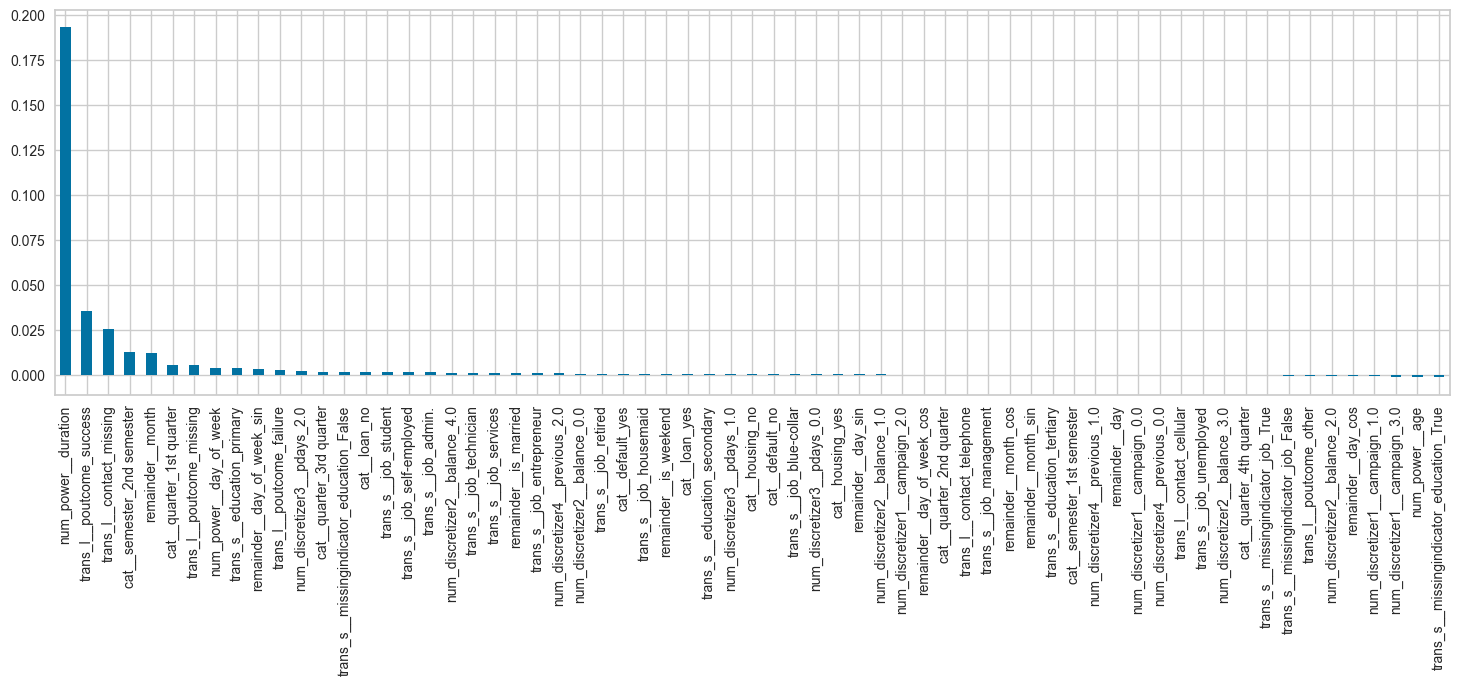

In [361]:
# drop in performance caused by shuffling the feature

# bar plot of the performance drops

pd.Series(sel.performance_drifts_).sort_values(ascending=False).plot.bar(
    figsize=(18, 5)
)

In [362]:
# features that will be removed

len(sel.features_to_drop_)

32

In [363]:
X_train_best = sel.transform(X_train_imp_num_cat)
X_test_best = sel.transform(X_test_imp_num_cat)

X_train_best.shape, X_test_best.shape

((36168, 33), (9043, 33))

In [364]:
# outcome for logistic regression
X_train_best.columns

Index(['trans_s__job_admin.', 'trans_s__job_entrepreneur',
       'trans_s__job_housemaid', 'trans_s__job_retired',
       'trans_s__job_self-employed', 'trans_s__job_services',
       'trans_s__job_student', 'trans_s__job_technician',
       'trans_s__education_primary', 'trans_s__education_secondary',
       'trans_s__missingindicator_education_False', 'trans_l__contact_missing',
       'trans_l__poutcome_failure', 'trans_l__poutcome_missing',
       'trans_l__poutcome_success', 'num_discretizer2__balance_0.0',
       'num_discretizer2__balance_4.0', 'num_discretizer3__pdays_1.0',
       'num_discretizer3__pdays_2.0', 'num_discretizer4__previous_2.0',
       'num_power__duration', 'num_power__day_of_week',
       'cat__quarter_1st quarter', 'cat__quarter_3rd quarter',
       'cat__semester_2nd semester', 'cat__loan_no', 'cat__loan_yes',
       'cat__default_yes', 'cat__housing_no', 'remainder__month',
       'remainder__is_married', 'remainder__day_of_week_sin',
       'remainder__is

In [366]:
log_reg_model.fit(X_train_best, y_train_transformed)

# print roc-auc in train_best and testing sets
print(
    "train_best auc score: ",
    f1_score(y_train_transformed, log_reg_model.predict(X_train_best)),
)
print(
    "test auc score: ",
    f1_score(y_test_transformed, log_reg_model.predict(X_test_best)),
)

train_best auc score:  0.44392450475744816
test auc score:  0.4600715137067938


### 3. Recursive feature addition

In [367]:
sel = RecursiveFeatureAddition(
    variables=None,  # automatically evaluate all numerical variables
    estimator=log_reg_model,  # the ML model
    scoring="f1",  # the metric we want to evalute
    threshold=0.0005,  # the maximum performance drop allowed to remove a feature
    cv=2,  # cross-validation
)

sel.fit(X_train_imp_num_cat, y_train_transformed)

RecursiveFeatureAddition(cv=2,
                         estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                         scoring='f1', threshold=0.0005)

In [368]:
sel.initial_model_performance_

0.44274926184712615

<Axes: >

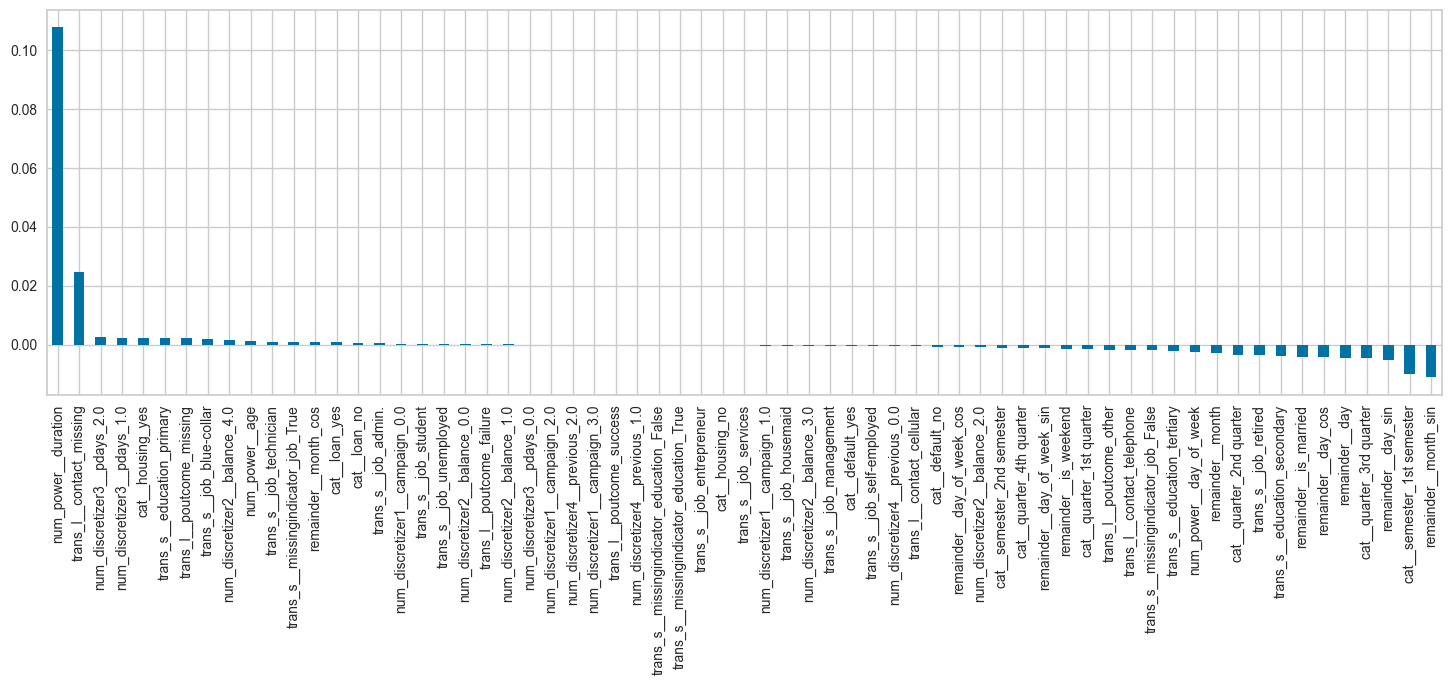

In [369]:
# drop in performance caused by shuffling the feature

# bar plot of the performance drops

pd.Series(sel.performance_drifts_).sort_values(ascending=False).plot.bar(
    figsize=(18, 5)
)

In [370]:
# features that will be removed

len(sel.features_to_drop_)

49

In [371]:
X_train_best = sel.transform(X_train_imp_num_cat)
X_test_best = sel.transform(X_test_imp_num_cat)

X_train_best.shape, X_test_best.shape

((36168, 16), (9043, 16))

In [372]:
# outcome for logistic regression
X_train_best.columns

Index(['trans_s__job_blue-collar', 'trans_s__job_technician',
       'trans_s__education_primary', 'trans_s__missingindicator_job_True',
       'trans_l__contact_missing', 'trans_l__poutcome_missing',
       'trans_l__poutcome_success', 'num_discretizer2__balance_4.0',
       'num_discretizer3__pdays_1.0', 'num_discretizer3__pdays_2.0',
       'num_power__age', 'num_power__duration', 'cat__loan_no',
       'cat__loan_yes', 'cat__housing_yes', 'remainder__month_cos'],
      dtype='object')

In [373]:
log_reg_model.fit(X_train_best, y_train_transformed)

# print roc-auc in train_best and testing sets
print(
    "train_best auc score: ",
    f1_score(y_train_transformed, log_reg_model.predict(X_train_best)),
)
print(
    "test auc score: ",
    f1_score(y_test_transformed, log_reg_model.predict(X_test_best)),
)

train_best auc score:  0.4386464263124605
test auc score:  0.43021148036253776


### 4. Target Mean Encoding

This method model dagnostic

In [294]:
sel = SelectByTargetMeanPerformance(
    variables=None,  # automatically finds categorical and numerical variables
    scoring="f1",  # the metric to evaluate performance
    threshold=0.3,  # the threshold for feature selection,
    bins=4,  # the number of intervals to discretise the numerical variables
    strategy="equal_frequency",  # whether the intervals should be of equal size or equal number of observations
    cv=5,  # cross validation
    regression=False,  # whether this is regression or classification
)


sel.fit(X_train_imp_num_cat, y_train_transformed)

SelectByTargetMeanPerformance(bins=4, cv=5, scoring='f1',
                              strategy='equal_frequency', threshold=0.3)

In [241]:
# here the selector stores the roc-auc per feature

sel.feature_performance_

{'trans_s__job_admin.': 0.0,
 'trans_s__job_blue-collar': 0.0,
 'trans_s__job_entrepreneur': 0.0,
 'trans_s__job_housemaid': 0.0,
 'trans_s__job_management': 0.0,
 'trans_s__job_retired': 0.0,
 'trans_s__job_self-employed': 0.0,
 'trans_s__job_services': 0.0,
 'trans_s__job_student': 0.0,
 'trans_s__job_technician': 0.0,
 'trans_s__job_unemployed': 0.0,
 'trans_s__education_primary': 0.0,
 'trans_s__education_secondary': 0.0,
 'trans_s__education_tertiary': 0.0,
 'trans_s__missingindicator_job_False': 0.0,
 'trans_s__missingindicator_job_True': 0.0,
 'trans_s__missingindicator_education_False': 0.0,
 'trans_s__missingindicator_education_True': 0.0,
 'trans_l__contact_cellular': 0.0,
 'trans_l__contact_missing': 0.0,
 'trans_l__contact_telephone': 0.0,
 'trans_l__poutcome_failure': 0.0,
 'trans_l__poutcome_missing': 0.0,
 'trans_l__poutcome_other': 0.0,
 'trans_l__poutcome_success': 0.0,
 'num_discretizer1__campaign': 0.0,
 'num_discretizer2__balance': 0.0,
 'num_discretizer3__pdays': 0

In [242]:
# and these are the features that will be dropped

sel.features_to_drop_

['trans_s__job_admin.',
 'trans_s__job_blue-collar',
 'trans_s__job_entrepreneur',
 'trans_s__job_housemaid',
 'trans_s__job_management',
 'trans_s__job_retired',
 'trans_s__job_self-employed',
 'trans_s__job_services',
 'trans_s__job_student',
 'trans_s__job_technician',
 'trans_s__job_unemployed',
 'trans_s__education_primary',
 'trans_s__education_secondary',
 'trans_s__education_tertiary',
 'trans_s__missingindicator_job_False',
 'trans_s__missingindicator_job_True',
 'trans_s__missingindicator_education_False',
 'trans_s__missingindicator_education_True',
 'trans_l__contact_cellular',
 'trans_l__contact_missing',
 'trans_l__contact_telephone',
 'trans_l__poutcome_failure',
 'trans_l__poutcome_missing',
 'trans_l__poutcome_other',
 'trans_l__poutcome_success',
 'num_discretizer1__campaign',
 'num_discretizer2__balance',
 'num_discretizer3__pdays',
 'num_discretizer4__previous',
 'num_power__age',
 'num_power__duration',
 'num_power__day_of_week',
 'cat__quarter_1st quarter',
 'cat_

In [243]:
X_train_best = sel.transform(X_train_imp_num_cat)
X_test_best = sel.transform(X_test_imp_num_cat)

X_train_best.shape, X_test_best.shape

((36168, 0), (9043, 0))

In [239]:
# outcome for logistic regression
X_train_best.columns

Index([], dtype='object')

In [234]:
log_reg_model.fit(X_train_best, y_train_transformed)

# print roc-auc in train_best and testing sets
print(
    "train_best auc score: ",
    f1_score(y_train_transformed, log_reg_model.predict(X_train_best)),
)
print(
    "test auc score: ",
    f1_score(y_test_transformed, log_reg_model.predict(X_test_best)),
)

train_best auc score:  0.8355421344718867
test auc score:  0.8332792354493598


#### 5. removing constant and quasi-constant and duplicated features


In [182]:
sel = DropConstantFeatures(tol=0.998, variables=None, missing_values="raise")

sel.fit(X_train_imp_num_cat)

DropConstantFeatures(tol=0.998)

In [183]:
sel.features_to_drop_

[]

In [184]:
sel = DropDuplicateFeatures(variables=None, missing_values="raise")
sel.fit(X_train_imp_num_cat)

DropDuplicateFeatures(missing_values='raise')

In [185]:
sel.features_to_drop_

set()

#### 6. Correlation
Here, I tried different feature selection techniques and the best performing one is the smartcorrelation selection using vaiance (this is model agnostic as well).

In [189]:

sel = DropCorrelatedFeatures(threshold=0.8, method="pearson", missing_values="ignore")

sel.fit(X_train_imp_num_cat)

DropCorrelatedFeatures()

In [190]:
sel.correlated_feature_sets_

[{'cat__default_no', 'cat__default_yes'},
 {'cat__housing_no', 'cat__housing_yes'},
 {'cat__loan_no', 'cat__loan_yes'},
 {'cat__quarter_2nd quarter',
  'cat__semester_1st semester',
  'cat__semester_2nd semester'},
 {'num_discretizer3__pdays_0.0', 'trans_l__poutcome_missing'},
 {'num_power__day_of_week', 'remainder__day_of_week_sin'},
 {'remainder__month', 'remainder__month_sin'},
 {'trans_l__contact_cellular', 'trans_l__contact_missing'},
 {'trans_s__missingindicator_education_False',
  'trans_s__missingindicator_education_True'},
 {'trans_s__missingindicator_job_False', 'trans_s__missingindicator_job_True'}]

In [192]:
len(sel.features_to_drop_), sel.features_to_drop_

(11,
 ['cat__default_yes',
  'cat__housing_yes',
  'cat__loan_yes',
  'cat__semester_1st semester',
  'cat__semester_2nd semester',
  'trans_l__poutcome_missing',
  'remainder__day_of_week_sin',
  'remainder__month_sin',
  'trans_l__contact_missing',
  'trans_s__missingindicator_education_True',
  'trans_s__missingindicator_job_True'])

In [196]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# correlation selector
sel = SmartCorrelatedSelection(
    variables=None,  # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=log_reg_model,
    scoring="f1",
    cv=3,
)
sel.fit(X_train_imp_num_cat, y_train_transformed)

SmartCorrelatedSelection(estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                         missing_values='raise', scoring='f1',
                         selection_method='model_performance')

In [197]:
sel.correlated_feature_sets_

[{'cat__default_no', 'cat__default_yes'},
 {'cat__housing_no', 'cat__housing_yes'},
 {'cat__loan_no', 'cat__loan_yes'},
 {'cat__quarter_2nd quarter',
  'cat__semester_1st semester',
  'cat__semester_2nd semester'},
 {'num_discretizer3__pdays_0.0', 'trans_l__poutcome_missing'},
 {'num_power__day_of_week', 'remainder__day_of_week_sin'},
 {'remainder__month', 'remainder__month_sin'},
 {'trans_l__contact_cellular', 'trans_l__contact_missing'},
 {'trans_s__missingindicator_education_False',
  'trans_s__missingindicator_education_True'},
 {'trans_s__missingindicator_job_False', 'trans_s__missingindicator_job_True'}]

In [198]:
len(sel.features_to_drop_), sel.features_to_drop_

(11,
 ['cat__default_no',
  'cat__housing_yes',
  'cat__loan_no',
  'cat__semester_1st semester',
  'cat__semester_2nd semester',
  'trans_l__poutcome_missing',
  'remainder__day_of_week_sin',
  'remainder__month',
  'trans_l__contact_cellular',
  'trans_s__missingindicator_education_False',
  'trans_s__missingindicator_job_True'])

In [206]:
sel = SmartCorrelatedSelection(
    selection_method="variance",
    variables=None,  # if none, selector examines all numerical variables
    method="pearson",
    threshold=0.8,
    scoring="f1",
    cv=3,
    missing_values="raise",
)
sel.fit(X_train_imp_num_cat, y_train_transformed)

SmartCorrelatedSelection(missing_values='raise', scoring='f1',
                         selection_method='variance')

In [207]:
sel.correlated_feature_sets_

[{'remainder__month', 'remainder__month_sin'},
 {'num_power__day_of_week', 'remainder__day_of_week_sin'},
 {'cat__quarter_2nd quarter',
  'cat__semester_1st semester',
  'cat__semester_2nd semester'},
 {'cat__housing_no', 'cat__housing_yes'},
 {'trans_l__contact_cellular', 'trans_l__contact_missing'},
 {'num_discretizer3__pdays_0.0', 'trans_l__poutcome_missing'},
 {'cat__loan_no', 'cat__loan_yes'},
 {'trans_s__missingindicator_education_False',
  'trans_s__missingindicator_education_True'},
 {'cat__default_no', 'cat__default_yes'},
 {'trans_s__missingindicator_job_False', 'trans_s__missingindicator_job_True'}]

In [208]:
len(sel.features_to_drop_), sel.features_to_drop_

(11,
 ['remainder__month_sin',
  'remainder__day_of_week_sin',
  'cat__semester_2nd semester',
  'cat__semester_1st semester',
  'cat__housing_no',
  'trans_l__contact_missing',
  'num_discretizer3__pdays_0.0',
  'cat__loan_no',
  'trans_s__missingindicator_education_False',
  'cat__default_yes',
  'trans_s__missingindicator_job_True'])

In [212]:
pipe = Pipeline(
    [
        ("constant", DropConstantFeatures(tol=0.998)),
        ("duplicated", DropDuplicateFeatures()),
        (
            "cor",
            SmartCorrelatedSelection(
                selection_method="variance",
                variables=None,  # if none, selector examines all numerical variables
                method="pearson",
                threshold=0.8,
                scoring="f1",
                cv=3,
                missing_values="raise",
            ),
        ),
    ]
)

pipe.fit(X_train_imp_num_cat, y_train_transformed)

X_train_best = pipe.transform(X_train_imp_num_cat)
X_test_best = pipe.transform(X_test_imp_num_cat)

X_train_best.shape, X_test_best.shape

((36168, 54), (9043, 54))

In [213]:
log_reg_model.fit(X_train_best, y_train_transformed)

# print roc-auc in train_best and testing sets
print(
    "train_best auc score: ",
    f1_score(y_train_transformed, log_reg_model.predict(X_train_best)),
)
print(
    "test auc score: ",
    f1_score(y_test_transformed, log_reg_model.predict(X_test_best)),
)

train_best auc score:  0.4421281891723709
test auc score:  0.45271867612293143


In [9]:
new_catergorical_features = ["quarter", "semester", "loan", "default", "housing"]

numeric_transformer = Pipeline(
    steps=[
        ("imputer", PowerTransformer(method="yeo-johnson", standardize=False)),
        (
            "scaler",
            StandardScaler(),
        ),  # Standardize features by removing the mean and scaling to unit variance
    ]
)
pipe_cat1 = Pipeline(
    [
        ("s_imputer", SimpleImputer(strategy="most_frequent", add_indicator=True)),
        (("s_ohe", OneHotEncoder(sparse_output=False, handle_unknown="error"))),
    ]
)

pipe_cat2 = Pipeline(
    [
        ("l_imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        (("l_ohe", OneHotEncoder(sparse_output=False, handle_unknown="error"))),
    ]
)


feature_transformer = ColumnTransformer(
    [
        ("trans_s", pipe_cat1, ["job", "education"]),
        ("trans_l", pipe_cat2, ["contact", "poutcome"]),
        (
            "num_discretizer1",
            KBinsDiscretizer(
                n_bins=4,
                encode="onehot-dense",
                strategy="uniform",
                subsample=None,
            ),
            ["campaign"],
        ),
        (
            "num_discretizer2",
            KBinsDiscretizer(
                n_bins=5,
                encode="onehot-dense",
                strategy="quantile",
                subsample=None,
            ),
            ["balance"],
        ),
        (
            "num_discretizer3",
            KBinsDiscretizer(
                n_bins=3,
                encode="onehot-dense",
                strategy="uniform",
                subsample=None,
            ),
            ["pdays"],
        ),
        (
            "num_discretizer4",
            KBinsDiscretizer(
                n_bins=3,
                encode="onehot-dense",
                strategy="uniform",
                subsample=None,
            ),
            ["previous"],
        ),
        (
            "num_power",
            numeric_transformer,
            ["age", "duration", "day_of_week"],
        ),
        (
            "cat",
            OneHotEncoder(sparse_output=False, handle_unknown="error"),
            new_catergorical_features,
        ),
        ("transformed", "drop", ["marital"]),  # drop these features
    ],
    remainder="passthrough",
).set_output(transform="pandas")

capper = Winsorizer(
    variables=[
        "balance",
        "duration",
        "campaign",
        "pdays",
        "previous",
    ],
    capping_method="quantiles",
    tail="both",
    fold=0.02,
)

select_transformer = RecursiveFeatureElimination(
    variables=None,  # automatically evaluate all numerical variables
    estimator=LogisticRegression(random_state=42, max_iter=1000),  # the ML model
    scoring="f1",  # the metric we want to evalute
    threshold=0.0005,  # the maximum performance drop allowed to remove a feature
    cv=2,  # cross-validation
)

select = Pipeline(
    [
        ("constant", DropConstantFeatures(tol=0.998)),
        ("duplicated", DropDuplicateFeatures()),
        (
            "correlation",
            SmartCorrelatedSelection(
                selection_method="variance",
                method="pearson",
                threshold=0.8,
                scoring="f1",
                cv=3,
                missing_values="raise",
                variables=None,
            ),
        ),
    ]
)

feature_engineering_pipeline = Pipeline(
    steps=[
        ("capping", capper),  # capping
        ("feature_creation", CustomFeatureCreator()),  # create feature
        ("feature_transform", feature_transformer),  # transform features
        ("filter", select),
        # ("feature_selection", select_transformer),  # select features
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("y", axis=1),
    data["y"],
    test_size=0.2,
    random_state=42,
)

label_encoder = LabelEncoder().fit(y_train)
y_train_transformed = label_encoder.transform(y_train)

feature_engineering_pipeline.fit(X_train)

X_train_imp_num_cat_select = feature_engineering_pipeline.transform(X_train)

X_test_imp_num_cat_select = feature_engineering_pipeline.transform(X_test)
y_test_transformed = label_encoder.transform(y_test)

X_train_imp_num_cat_select.head()

trans_s__job_admin.  trans_s__job_blue-collar  \
3344                   0.0                       1.0   
17965                  0.0                       0.0   
18299                  1.0                       0.0   
10221                  0.0                       0.0   
32192                  0.0                       1.0   

       trans_s__job_entrepreneur  trans_s__job_housemaid  \
3344                         0.0                     0.0   
17965                        0.0                     0.0   
18299                        0.0                     0.0   
10221                        0.0                     0.0   
32192                        0.0                     0.0   

       trans_s__job_management  trans_s__job_retired  \
3344                       0.0                   0.0   
17965                      0.0                   0.0   
18299                      0.0                   0.0   
10221                      1.0                   0.0   
32192                      0.0                   0.0   

       trans_s__job_self-employed  trans_s__job_services  \
3344                          0.0                    0.0   
17965                         0.0                    0.0   
18299                         0.0                    0.0   
10221                         0.0                    0.0   
32192                         0.0                    0.0   

       trans_s__job_student  trans_s__job_technician  ...  cat__default_no  \
3344                    0.0                      0.0  ...              1.0   
17965                   0.0                      1.0  ...              1.0   
18299                   0.0                      0.0  ...              1.0   
10221                   0.0                      0.0  ...              1.0   
32192                   0.0                      0.0  ...              1.0   

       cat__housing_yes  remainder__month  remainder__is_married  \
3344                1.0                 5                      1   
17965               1.0                 7                      1   
18299               0.0                 7                      1   
10221               1.0                 6                      0   
32192               0.0                 4                      1   

       remainder__day  remainder__day_of_week_cos  remainder__day_sin  \
3344                1                   -0.994869            0.781831   
17965               2                    0.979530            0.974928   
18299               3                    1.000000            0.433884   
10221               4                   -0.612106           -0.433884   
32192               1                   -0.994869            0.781831   

       remainder__day_cos  remainder__is_weekend  remainder__month_cos  
3344             0.623490                      0             -0.866025  
17965           -0.222521                      0             -0.866025  
18299           -0.900969                      0             -0.866025  
10221           -0.900969                      0             -1.000000  
32192            0.623490                      0             -0.500000  

[5 rows x 54 columns]

# Evaluation metrics

Here, I chose the area under the precision-recall curve because it is a threshold independent metric and robust to imbalance dataset. I used a f1-score above because it balances the precision and recall scores

In [210]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

log_reg_model.fit(X_train_imp_num_cat_select, y_train_transformed)

y_test_pred = log_reg_model.predict_proba(X_test_imp_num_cat_select)[:, 1]

y_test_pred_ = log_reg_model.predict(X_test_imp_num_cat_select)

precision, recall, thresholds = precision_recall_curve(y_test_transformed, y_test_pred)

auc_logit = auc(recall, precision)
print("Area under PR Curve Logistic Regression: ", auc_logit)

# print("F1 Score: ", f1_score(y_test_transformed, y_test_pred))

Area under PR Curve Logistic Regression:  0.5621338863517502


Below, I show two ways to visualize the metrics using sklearn and Yellowbrick

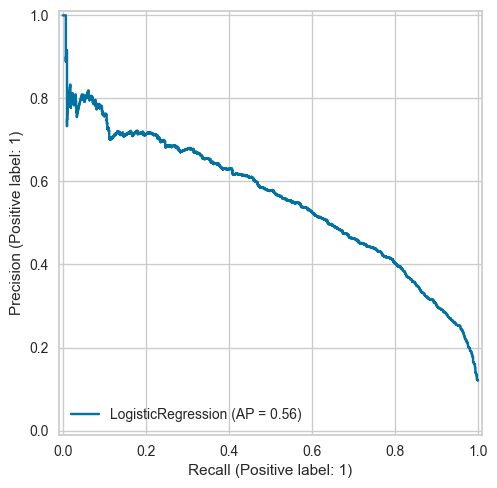

In [378]:
logit_disp = PrecisionRecallDisplay.from_estimator(
    log_reg_model, X_test_imp_num_cat_select, y_test_transformed
)

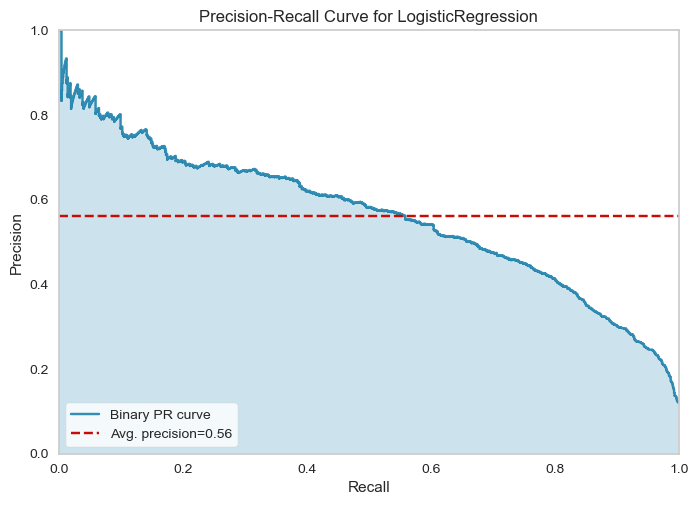

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [85]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

visualizer = PrecisionRecallCurve(log_reg_model, classes=[0, 1])

visualizer.fit(
    X_train_imp_num_cat_select, y_train_transformed
)  # Fit the training data to the visualizer
visualizer.score(
    X_test_imp_num_cat_select, y_test_transformed
)  # Evaluate the model on the test data
visualizer.show()

/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


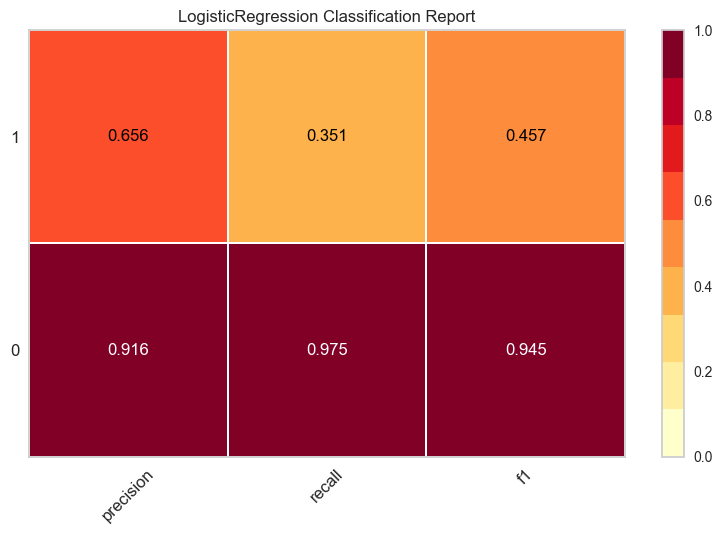

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [380]:
from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

visualizer = ClassificationReport(log_reg_model)

visualizer.fit(
    X_train_imp_num_cat_select, y_train_transformed
)  # Fit the training data to the visualizer
visualizer.score(
    X_test_imp_num_cat_select, y_test_transformed
)  # Evaluate the model on the test data
visualizer.show()

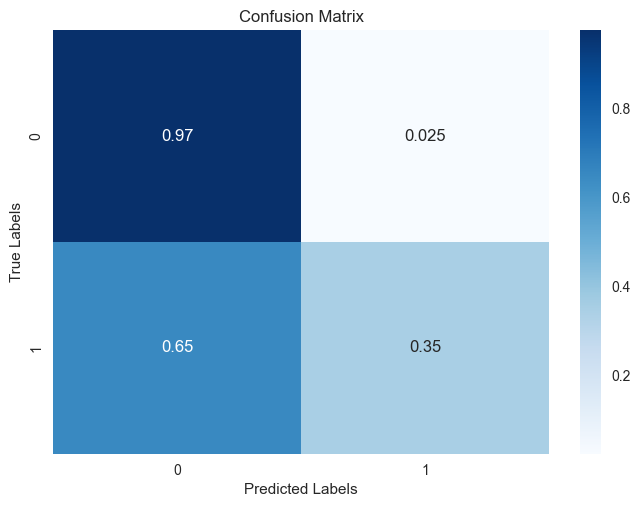

In [381]:
cm = confusion_matrix(y_test_transformed, y_test_pred_, labels=[0, 1], normalize="true")

sns.heatmap(
    cm, annot=True, cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Below, I show what threshold gives the best metric for f1 score

/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


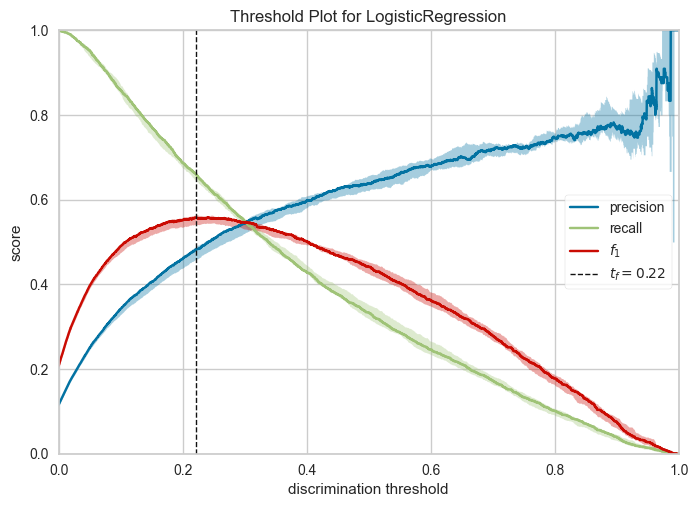

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [382]:
visualizer = DiscriminationThreshold(
    log_reg_model,
    n_trials=5,
    cv=0.5,
    argmax="fscore",
    random_state=0,
    is_fitted="auto",
    exclude="queue_rate",
)

visualizer.fit(
    X_train_imp_num_cat_select, y_train_transformed
)  # Fit the training data to the visualizer
visualizer.score(
    X_test_imp_num_cat_select, y_test_transformed
)  # Evaluate the model on the test data
visualizer.show()

## Modelling

In [211]:
# Setting up models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(
        class_weight="balanced", solver="saga", max_iter=1000, random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(
        class_weight="balanced", random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        scale_pos_weight=sum(y_train_transformed == 0) / sum(y_train_transformed == 1),
        random_state=42,
    ),  # XGBoost handles imbalance by scale_pos_weight
    "Extra Trees": ExtraTreesClassifier(class_weight="balanced", random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "BaggingClassifier": BaggingClassifier(
        estimator=ExtraTreeClassifier(random_state=42), n_estimators=100
    ),
}


# Scorer for cross-validation: Area Under Precision-Recall Curve (AUPRC)
def auprc_score(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)


auprc = make_scorer(auprc_score, needs_proba=True)

# Perform cross-validation and store results
results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train_imp_num_cat_select,
        y_train_transformed,
        cv=skf,
        scoring=auprc,
    )
    results[name] = np.mean(scores)
    print(f"{name}: Mean AUPRC = {results[name]:.4f}")

# Comparing models
best_model = max(results, key=results.get)
print(
    f"Best model based on AUPRC: {best_model} with an AUPRC of {results[best_model]:.4f}"
)

/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Naive Bayes: Mean AUPRC = 0.3721
Logistic Regression: Mean AUPRC = 0.5412
Decision Tree: Mean AUPRC = 0.4832
Random Forest: Mean AUPRC = 0.5930
Gradient Boosting: Mean AUPRC = 0.6022
XGBoost: Mean AUPRC = 0.5881
Extra Trees: Mean AUPRC = 0.5432
AdaBoost: Mean AUPRC = 0.5285
BaggingClassifier: Mean AUPRC = 0.5654
Best model based on AUPRC: Gradient Boosting with an AUPRC of 0.6022


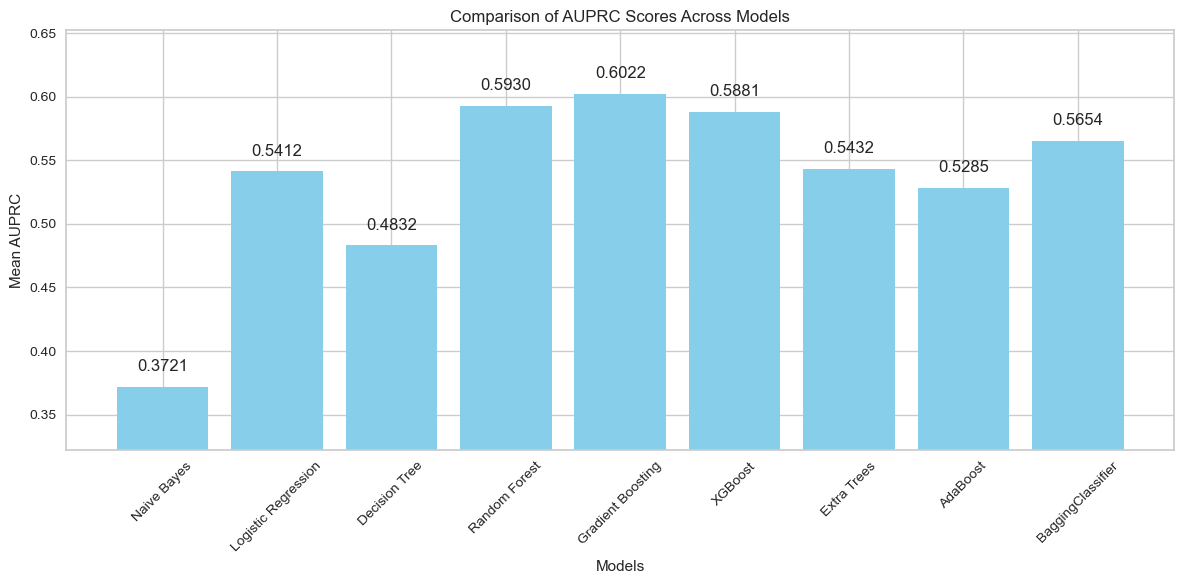

In [214]:
# Names of the models
model_names = list(results.keys())
# AUPRC scores
auprc_scores = [results[name] for name in model_names]

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names, auprc_scores, color="skyblue")
plt.xlabel("Models")
plt.ylabel("Mean AUPRC")
plt.title("Comparison of AUPRC Scores Across Models")
plt.xticks(rotation=45)
plt.ylim(
    [min(auprc_scores) - 0.05, max(auprc_scores) + 0.05]
)  # Set y-axis limits to give some padding

# Adding the score above each bar
for i, v in enumerate(auprc_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

The best model is the Gradient Boosting with a cross-validation error of 0.601 and we continue to build the final model.

Here we train the Gradient Boosting model over different iterations to study the effect on the generalistion and training metrics

In [215]:
final_model = GradientBoostingClassifier()
final_model.fit(X_train_imp_num_cat_select, y_train_transformed)


# Custom AUPRC evaluation metric
def auprc_score(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)


# Predict probabilities on the evaluation set
y_pred = final_model.predict_proba(X_train_imp_num_cat_select)[:, 1]

# Calculate the AUPRC score
auprc = auprc_score(y_train_transformed, y_pred)
print(f"TRAIN AUPRC: {auprc}")


# Predict probabilities on the evaluation set
y_pred = final_model.predict_proba(X_test_imp_num_cat_select)[:, 1]

# Calculate the AUPRC score
auprc = auprc_score(y_test_transformed, y_pred)
print(f"TEST AUPRC: {auprc}")

TRAIN AUPRC: 0.6337202996242581
TEST AUPRC: 0.6039891621890787


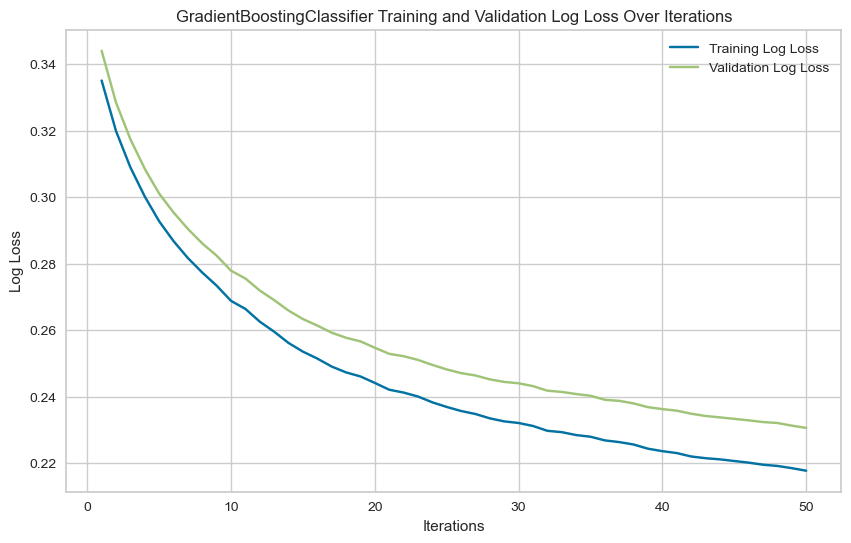

In [216]:
def fit_and_track_gbc(X_train, y_train, X_val, y_val, num_rounds=50):
    model = GradientBoostingClassifier(n_estimators=num_rounds, loss="log_loss")

    train_logloss = []
    val_logloss = []

    for i in range(1, num_rounds + 1):
        model.n_estimators = i
        model.fit(X_train, y_train)

        y_train_pred = model.predict_proba(X_train)[:, 1]
        y_val_pred = model.predict_proba(X_val)[:, 1]

        train_logloss.append(log_loss(y_train, y_train_pred))
        val_logloss.append(log_loss(y_val, y_val_pred))

    return train_logloss, val_logloss


# Assuming X_train, y_train, X_val, y_val have been defined
train_logloss, val_logloss = fit_and_track_gbc(
    X_train_imp_num_cat_select,
    y_train_transformed,
    X_test_imp_num_cat_select,
    y_test_transformed,
)

# Plotting
iterations = range(1, len(train_logloss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, train_logloss, label="Training Log Loss")
plt.plot(iterations, val_logloss, label="Validation Log Loss")
plt.title("GradientBoostingClassifier Training and Validation Log Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

Feature Importances:


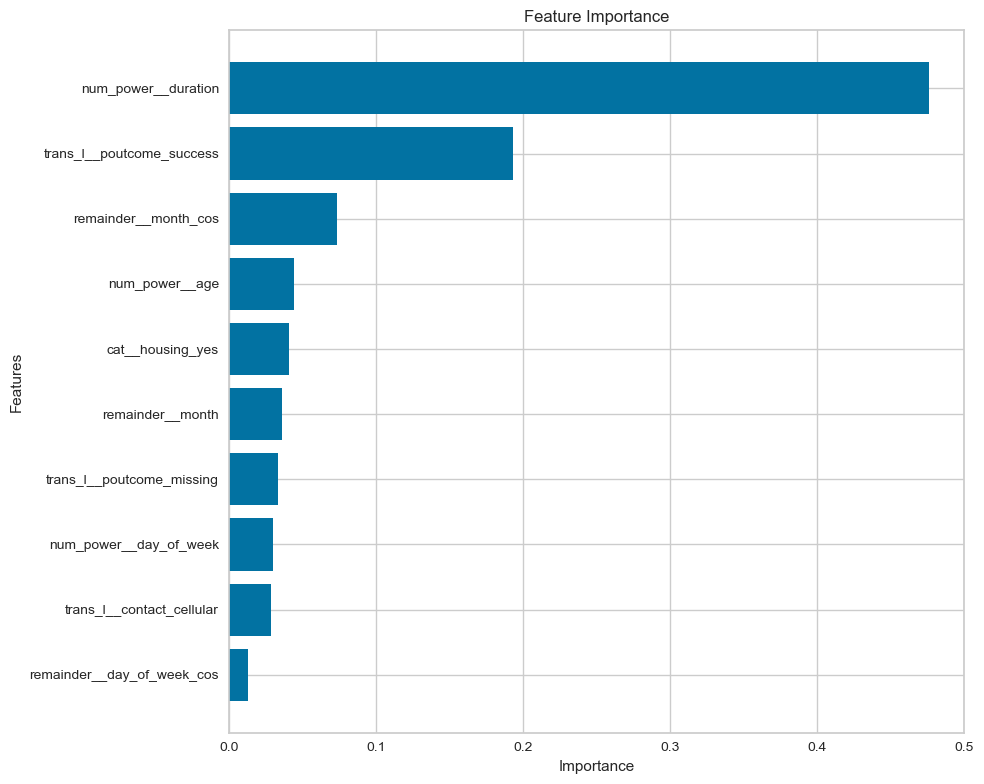

In [217]:
feature_names = X_train_imp_num_cat_select.columns.tolist()

# Extract feature importances
feature_importances = final_model.feature_importances_

# Create a dictionary mapping feature names to their importance
feature_importances_dict = {
    name: importance for name, importance in zip(feature_names, feature_importances)
}

# Print the feature importance
print("Feature Importances:")
# for feature, importance in feature_importances_dict.items():
#     print(f"Feature: {feature}, Importance: {importance}")

# Sorting the features based on importance
sorted_importances = sorted(
    feature_importances_dict.items(), key=lambda x: x[1], reverse=True
)
features, importances = zip(*sorted_importances)

# Creating a bar chart
plt.figure(figsize=(10, 8))
plt.barh(features[:10], importances[:10])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert the Y-axis to show the most important feature at the top
plt.tight_layout()
plt.show()

## Imbalance solutions

#### SMOTENC

In [6]:
y_train.value_counts(normalize=True)

y
no     0.883931
yes    0.116069
Name: proportion, dtype: float64

In [29]:
smotenc = SMOTENC(categorical_features=categorical_variables, random_state=42)
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train, y_train)

In [30]:
y_train_resampled.value_counts(normalize=True)

y
no     0.5
yes    0.5
Name: proportion, dtype: float64

In [49]:
def auprc_score(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("y", axis=1),
    data["y"],
    test_size=0.2,
    random_state=42,
)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)


In [53]:
feature_engineering_pipeline = Pipeline(
    steps=[
        ("capping", capper),  # capping
        ("feature_creation", CustomFeatureCreator()),  # create feature
        ("feature_transform", feature_transformer),  # transform features
        ("filter", select),
        # ("feature_selection", select_transformer),  # select features
    ]
)

feature_engineering_pipeline.fit(X_train)


def score_model_smotenc(model, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    smoter = SMOTENC(categorical_features=categorical_variables, random_state=42)

    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = (
            X_train.iloc[train_fold_index],
            y_train[train_fold_index],
        )
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # Upsample only the data in the training section
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(
            X_train_fold, y_train_fold
        )
        label_encoder = LabelEncoder().fit(y_train_fold_upsample)
        y_train_fold_upsample = label_encoder.transform(y_train_fold_upsample)
        y_val_fold = label_encoder.transform(y_val_fold)

        X_train_fold_upsample = feature_engineering_pipeline.transform(
            X_train_fold_upsample
        )
        print(X_train_fold_upsample.shape, y_train_fold_upsample.shape)

        X_val_fold = feature_engineering_pipeline.transform(X_val_fold)
        # Fit the model on the upsampled training data
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = auprc_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.mean(scores)


model = GradientBoostingClassifier()

scores_smotenc = score_model_smotenc(model, cv=None)
print("mean cross val scores for rus:", scores_smotenc)

(42626, 54) (42626,)
(42626, 54) (42626,)
(42628, 54) (42628,)
mean cross val scores for rus: 0.6161547425568009


#### CTGAN

In [46]:
def apply_ctgan(X_train, y_train, categorical_columns):
    # Combine X and y for CTGAN input
    data = X_train.copy()
    data["target"] = y_train

    # Identify the minority class
    minority_class = data["target"].value_counts().idxmin()
    majority_class = data["target"].value_counts().idxmax()

    minority_count = data["target"].value_counts().min()
    majority_count = data["target"].value_counts().max()

    if minority_count == 0:
        raise ValueError("No samples in the minority class.")

    # Adjust the number of synthetic samples to generate
    synthetic_count = majority_count - minority_count

    if synthetic_count <= 0:
        raise ValueError("Synthetic count must be greater than 0.")

    # Fit the CTGAN model
    ctgan = CTGAN(epochs=5)
    ctgan.fit(data, discrete_columns=categorical_columns + ["target"])
    # Generate synthetic samples
    synthetic_data = ctgan.sample(
        synthetic_count, condition_column="target", condition_value=minority_class
    )

    # Filter to ensure only minority class samples are used if necessary
    synthetic_minority = synthetic_data[synthetic_data["target"] == minority_class]

    # If synthetic_minority is still too large or small, adjust the count again
    adjustment_count = synthetic_count - len(synthetic_minority)
    print(synthetic_count, adjustment_count, minority_class, majority_class)

    if adjustment_count > 0:
        additional_synthetic = ctgan.sample(adjustment_count)
        additional_synthetic_minority = additional_synthetic[
            additional_synthetic["target"] == minority_class
        ]
        synthetic_minority = pd.concat(
            [synthetic_minority, additional_synthetic_minority]
        )

    # Combine the original training data with the synthetic minority class data
    synthetic_data_X = synthetic_minority.drop("target", axis=1).values
    synthetic_data_y = synthetic_minority["target"].values
    X_train_ctgan = pd.DataFrame(
        np.vstack((X_train, synthetic_data_X)), columns=X_train.columns.to_list()
    )
    y_train_ctgan = pd.DataFrame(np.hstack((y_train, synthetic_data_y)), columns=["y"])

    return X_train_ctgan, y_train_ctgan


X, y = apply_ctgan(X_train, y_train, categorical_variables)
X.shape, np.sum(y == 0), np.sum(y == 1), X_train.shape, np.sum(y_train == 0), np.sum(
    y_train == 1
)

27772 24626 1 0


((42592, 16),
 y    31970
 dtype: int64,
 y    10622
 dtype: int64,
 (36168, 16),
 31970,
 4198)

In [57]:
X.head()

age          job  marital  education default balance housing loan   contact  \
0  41  blue-collar  married    primary      no     849     yes   no       NaN   
1  49   technician  married    primary      no    1415     yes   no  cellular   
2  42       admin.  married  secondary      no    3842      no   no  cellular   
3  37   management   single   tertiary      no    -119     yes   no       NaN   
4  56  blue-collar  married    primary      no    3498      no   no  cellular   

  day_of_week month duration campaign pdays previous poutcome  
0          15   may       72        1    -1        0      NaN  
1          30   jul      269        2    -1        0      NaN  
2          31   jul      130        4    -1        0      NaN  
3          11   jun      375       11    -1        0      NaN  
4          15   apr      264        2    -1        0      NaN

In [63]:
X["job"][X["job"].isnull()]

51       NaN
165      NaN
646      NaN
839      NaN
1233     NaN
        ... 
42186    NaN
42263    NaN
42463    NaN
42571    NaN
42582    NaN
Name: job, Length: 309, dtype: object

In [56]:
def score_model_ctgan(model, cv=None, categorical_columns=categorical_variables):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = (
            X_train.iloc[train_fold_index],
            y_train[train_fold_index],
        )
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # Upsample only the data in the training section
        X_train_fold_upsample, y_train_fold_upsample = apply_ctgan(
            X_train_fold, y_train_fold, categorical_columns=categorical_columns
        )

        label_encoder = LabelEncoder().fit(y_train_fold_upsample)
        y_train_fold_upsample = label_encoder.transform(y_train_fold_upsample)
        y_val_fold = label_encoder.transform(y_val_fold)

        X_train_fold_upsample = feature_engineering_pipeline.transform(
            X_train_fold_upsample
        )
        print(X_train_fold_upsample.shape, y_train_fold_upsample.shape)

        X_val_fold = feature_engineering_pipeline.transform(X_val_fold)
        # Fit the model on the upsampled training data
        model_obj = model.fit(X_train_fold_upsample, y_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = auprc_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.mean(scores)


model = GradientBoostingClassifier()

scores_ctgan = score_model_ctgan(
    model, cv=None, categorical_columns=categorical_variables
)
print("mean cross val scores ctgan:", scores_ctgan)

18514 15784 1 0


/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### RandomUnderSampling

In [54]:
def score_model_rus(model, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    rus = RandomUnderSampler(random_state=42)

    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = (
            X_train.iloc[train_fold_index],
            y_train[train_fold_index],
        )
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # Downsample only the data in the training section
        X_train_fold_downsample, y_train_fold_downsample = rus.fit_resample(
            X_train_fold, y_train_fold
        )
        label_encoder = LabelEncoder().fit(y_train_fold_downsample)
        y_train_fold_downsample = label_encoder.transform(y_train_fold_downsample)
        y_val_fold = label_encoder.transform(y_val_fold)

        X_train_fold_downsample = feature_engineering_pipeline.transform(
            X_train_fold_downsample
        )
        print(X_train_fold_downsample.shape, y_train_fold_downsample.shape)

        X_val_fold = feature_engineering_pipeline.transform(X_val_fold)
        # Fit the model on the downsampled training data
        model_obj = model.fit(X_train_fold_downsample, y_train_fold_downsample)
        # Score the model on the (non-upsampled) validation data
        score = auprc_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.mean(scores)


model = GradientBoostingClassifier()

scores_rus = score_model_rus(model, cv=None)
print("mean cross val scores for rus:", scores_rus)

(5598, 54) (5598,)
(5598, 54) (5598,)
(5596, 54) (5596,)
mean cross val scores for rus: 0.6485845985718356


#### SMOTENC + RandomUnderSampling

In [55]:
def score_model_smotenc_rus(model, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    smoter = SMOTENC(categorical_features=categorical_variables, random_state=42)
    rus = RandomUnderSampler(random_state=42)
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = (
            X_train.iloc[train_fold_index],
            y_train[train_fold_index],
        )
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # Upsample only the data in the training section
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(
            X_train_fold, y_train_fold
        )

        # Downsample the upsampled
        X_train_fold_downsample, y_train_fold_downsample = rus.fit_resample(
            X_train_fold_upsample, y_train_fold_upsample
        )
        label_encoder = LabelEncoder().fit(y_train_fold_downsample)
        y_train_fold_downsample = label_encoder.transform(y_train_fold_downsample)
        y_val_fold = label_encoder.transform(y_val_fold)

        X_train_fold_downsample = feature_engineering_pipeline.transform(
            X_train_fold_downsample
        )
        print(X_train_fold_downsample.shape, y_train_fold_downsample.shape)

        X_val_fold = feature_engineering_pipeline.transform(X_val_fold)
        # Fit the model on the upsampled training data
        model_obj = model.fit(X_train_fold_downsample, y_train_fold_downsample)
        # Score the model on the (non-upsampled) validation data
        score = auprc_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.mean(scores)


model = GradientBoostingClassifier()

scores_smotenc_rus = score_model_smotenc_rus(model, cv=None)
print("mean cross val scores for rus:", scores_smotenc_rus)

(42626, 54) (42626,)
(42626, 54) (42626,)
(42628, 54) (42628,)
mean cross val scores for rus: 0.6161547425568009


In [54]:
from imblearn.pipeline import make_pipeline

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def auprc_score(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)


auprc = make_scorer(auprc_score, needs_proba=True)


def evaluate_model(model, resampler, X, y):
    model_ = make_pipeline(resampler, model)
    scores = cross_val_score(model_, X, y, cv=skf, scoring=auprc)
    return scores

/home/godwin/Desktop/Organised/python/python/Traineeship/.venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
